# Project 1: Driving Licenses, Traffic Accidents and Casualties Analysis

## Problem Statment


In 2017, it was estimated that a car accident happens every minute on average in Saudi Arabia. Furthermore, the estimation was considered an improvement when compared to 2016. As we have access to car traffic accidents data, the primary objective of this project is to link recent incidents or developments to changes of trends in our dataset.

## Executive Summary


In Conclusion, the reduction in annual traffic accidents and casualties could be linked to recent developments in the infrastructure of Saudi Arabia. However, more data is needed to interpret deviant regions.

### Contents:
- [Datasets Description](#Datasets-Description)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here, including any Jupyter magic commands*

In [1]:
#Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats
from sklearn.preprocessing import StandardScaler

## Datasets Description

[Driving Licenses](https://datasource.kapsarc.org/explore/dataset/saudi-arabia-driving-licenses-issued-in-the-kingdom-2004-2008/information/?disjunctive.administritive_area&sort=time_period&location=5,24.37495,45.08024&basemap=jawg.streets)
This dataset contains Saudi Arabia Driving Licenses Issued By Administrative Area for 1993 - 2016. Data from General Authority for Statistics . Follow datasource.kapsarc.org for timely data to advance energy economics research.

[Traffic Accidents and Casualties](https://datasource.kapsarc.org/explore/dataset/saudi-arabia-traffic-accidents-and-casualties-injured-dead-2008/export/?disjunctive.region&disjunctive.indicator&sort=time_period)
This dataset contains Saudi Arabia Traffic Accidents and Casualties by Region for 2016. Data from General Authority for Statistics. Follow datasource.kapsarc.org for timely data to advance energy economics research.


## Data Import and Cleaning

#### 1. Read In Driving Licenses & Traffic Accidents Data
Read in the `saudi-arabia-traffic-accidents-2008.csv` and `saudi-arabia-driving-licenses-2004-2008.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
#Code
traffic_data = pd.read_csv("../data/saudi-arabia-traffic-accidents-2008.csv",sep=';')
license_data = pd.read_csv("../data/saudi-arabia-driving-licenses-2004-2008.csv",sep=';')

#### 2. Display data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
#Code
traffic_data.head(10)

,Unnamed: 0,Unnamed: 0.1,Year,Region,Indicator,Value,geo_point_2d
0,0,0,(2016),Makkah,No. of Casualties - Injured,12383n,"21.628962766, 41.2636898334"
1,1,1,(2016),Eastern Region,No. of Casualties - Dead,1113n,"23.2883307307, 50.1478302439"
2,2,2,(2016),Tabouk,No. of Casualties - Dead,434n,"27.90165499, 37.2598581394"
3,3,3,(2016),Hail,No. of Casualties - Dead,299n,"27.400845724, 41.4406960508"
4,4,4,(2016),Hail,No. of Accidents,10199n,"27.400845724, 41.4406960508"
5,5,5,(2016),Northern Boarder,No. of Casualties - Dead,193n,"30.197074783, 41.8171186952"
6,6,6,(2017),Jazan,No. of Accidents,22161n,"17.2072313962, 42.6525807422"
7,7,7,(2017),Al-Jouf,No. of Accidents,10469n,"29.9677445762, 39.5570371172"
8,8,8,(2017),Total,No. of Casualties - Dead,7489n,NaN
9,9,9,(2016),Northern Boarder,No. of Casualties - Injured,631n,"30.197074783, 41.8171186952"


In [4]:
license_data.head(10)

,Unnamed: 0,Year,Administritive Area,Driving Liceses,geo_point_2d
0,0,(2012),Makkah,143954n,"21.628962766, 41.2636898334"
1,1,(1994),Makkah,75349n,"21.628962766, 41.2636898334"
2,2,(1998),Makkah,86082n,"21.628962766, 41.2636898334"
3,3,(2004),Makkah,86636n,"21.628962766, 41.2636898334"
4,4,(2005),Makkah,65099n,"21.628962766, 41.2636898334"
5,5,(2008),Makkah,77013n,"21.628962766, 41.2636898334"
6,6,(2014),Madinah,31447n,"24.927534539, 39.4918237173"
7,7,(2013),Madinah,28513n,"24.927534539, 39.4918237173"
8,8,(2012),Madinah,14459n,"24.927534539, 39.4918237173"
9,9,(1994),Madinah,3767n,"24.927534539, 39.4918237173"


#### 3. Briefly describe the data

Take your time looking through the data and briefly describe the data in the markdown cell below. Note things about what the columns might mean, and the general information that is conveyed in the dataframe.

Answer:
* **Traffic Accidents Dataset**
    * The first two columns **Unnamed:0** and **Unnamed:1** are redundant as pandas already has an index therefore they need to be removed
    * **Year**: is the year of the accidents. Value is an object which needs to be processed to remove the brackets then converted to integer
    * **Region**: A categorical feature of type string indicating the region in which the accedents occured.
    * **Indicator**: is a categorical feature that has extra information about each record (needs to be one-hot encoded with **Values**: feature for a more meaningful dataset
    * **Values**: a value corresponding to the **Indicator** feature however, it needs processing to remove 'n' and convert to numeric
    * **geo_point_2d**: is the latitude, longitude coordinates of the middle point of the **Region**
    
* **Driving License Dataset**
    * The first column **Unnamed:0** is redundant as pandas will automatically have an index for us
    * **Year**: is the year in which the licenses were issued. the values are in a tuple which needs to be extracted for eaasier access
    * **Administritive Area**: is a categorical feature of the region that issued the licenses
    * **Driving License**: The number of driving license issued, values need to be processed to take out the ending 'n' and converted to numeric
    * **geo_point_2d**: The lattitude and longitude of middle point point of the region.

#### 4a. How complete is the data?

Investigate missing values etc.

In [5]:
#Code
def nan_percentage(df):
    '''
    a function to find the percentage of missing values in each column in the dataset
    '''
    # iterating thru each column
    for col in df.columns:
        # calculate the percentage of missing value to total length and print it nicely
        print("{}% of the enteries in '{}' feature is mising".format(df[col].isna().sum()/df[col].shape[0]*100, col))

# calling function to print percentage, then printing the number of missing values
# putting the function in print to prevent jupyter from erasing the prints
print(nan_percentage(license_data),license_data.isna().sum(),sep='\n\n\n\n')
# For license dataset, we can see that there are 25 missing values in the coordinates feature only. This represents 7% of the total values in that column

0.0% of the enteries in 'Unnamed: 0' feature is mising
0.0% of the enteries in 'Year' feature is mising
0.0% of the enteries in 'Administritive Area' feature is mising
0.0% of the enteries in 'Driving Liceses' feature is mising
7.142857142857142% of the enteries in 'geo_point_2d' feature is mising
None



Unnamed: 0              0
Year                    0
Administritive Area     0
Driving Liceses         0
geo_point_2d           25
dtype: int64


In [6]:
print(nan_percentage(traffic_data),traffic_data.isna().sum(),sep='\n\n\n\n')
# For Traffic dataset, we can see that there are 6 missing values in the coordinates feature only. This represents 7% of the total values in that column

0.0% of the enteries in 'Unnamed: 0' feature is mising
0.0% of the enteries in 'Unnamed: 0.1' feature is mising
0.0% of the enteries in 'Year' feature is mising
0.0% of the enteries in 'Region' feature is mising
0.0% of the enteries in 'Indicator' feature is mising
0.0% of the enteries in 'Value' feature is mising
7.142857142857142% of the enteries in 'geo_point_2d' feature is mising
None



Unnamed: 0      0
Unnamed: 0.1    0
Year            0
Region          0
Indicator       0
Value           0
geo_point_2d    6
dtype: int64


* For license dataset, we can see that there are 25 missing values in the coordinates feature only. This represents 7% of the total values in that column
* For Traffic dataset, we can see that there are 6 missing values in the coordinates feature only. This represents 7% of the total values in that column

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each dataset? What is the maximum *possible* value?**

In [7]:
#Code

# we need to drop all the empty columns before processing some columns to find the min and max
traffic_data.dropna(inplace=True)
license_data.dropna(inplace=True)
# Before finding the min and max values, the numeric columns need to be processed as they are objects now

def process_coordinates(string):
    lat,lon = string.split(',')
    return (float(lat),float(lon))

# processing the year column in traffic accedents dataset (removing brackets then convert to int)
traffic_data.Year = traffic_data.Year.apply(lambda x: int(x[1:-1]))
# processing value column for traffic accidents dataset (removing the n then converting to int)
traffic_data.Value = traffic_data.Value.apply(lambda x: int(x[:-1]))
# processing coordinates column to become a tuple containing floats
traffic_data.geo_point_2d = traffic_data.geo_point_2d.apply(process_coordinates)

# processing the year column in traffic accedents dataset (removing brackets then convert to int)
license_data.Year = license_data.Year.apply(lambda x: int(x[1:-1]))
# processing value column for traffic accidents dataset (removing the n then converting to int)
license_data['Driving Liceses'] = license_data['Driving Liceses'].apply(lambda x: int(x[:-1]))
# processing coordinates column to become a tuple containing floats
license_data.geo_point_2d = license_data.geo_point_2d.apply(process_coordinates)

In [8]:
# These are the minimum values for traffic accidents dataset, 
traffic_data.min()
# year starts from 2016
# Region is ordered alphabetically so minimum is anything that starts with an A
# Indicator minimum does not make sense as there is no ordering in this categorical column (it will order it by string anyways)
# Value is the value responding to a speciffic indicator, the minimum is 112
# Geolocation goes by minimum lat, then minimum lon. however, it does not make sense in this context

Unnamed: 0                                   0
Unnamed: 0.1                                 0
Year                                      2016
Region                                Al-Baaha
Indicator                     No. of Accidents
Value                                      112
geo_point_2d    (17.2072313962, 42.6525807422)
dtype: object

In [9]:
# These are the maximum values in in the traffic accidents dataset,
traffic_data.max()
# year maximum value is 2017
# Region is ordered alphabetically so maximum is the last Tabouk
# Indicator maximum does not make sense as there is no ordering in this categorical column (it will order it by string anyways)
# Value is the value responding to a speciffic indicator, the maximum is 145,541
# Geolocation goes by maximum lat, then maximum lon. however, it does not make sense in this context to find the maximum

Unnamed: 0                                 83
Unnamed: 0.1                               83
Year                                     2017
Region                                 Tabouk
Indicator         No. of Casualties - Injured
Value                                  145541
geo_point_2d    (30.197074783, 41.8171186952)
dtype: object

In [10]:
# These are the minimum values for license dataset, 
license_data.min()
# year starts from 1993
# Administrative Area is ordered alphabetically so minimum is anything that starts with an A
# Driving Licenses minimum is 915
# Geolocation goes by minimum lat, then minimum lon. however, it does not make sense in this context

Unnamed: 0                                          0
Year                                             1993
Administritive Area                           Al-Baha
Driving Liceses                                   915
geo_point_2d           (17.2072313962, 42.6525807422)
dtype: object

In [11]:
# These are the maximum values for license dataset, 
license_data.max()
# year maximum is 2017
# Administrative Area is ordered alphabetically so maximum is is Tabouk
# Driving Licenses maximum is 495,307
# Geolocation goes by maximum lat, then maximum lon. however, it does not make sense in this context

Unnamed: 0                                       349
Year                                            2017
Administritive Area                           Tabouk
Driving Liceses                               495307
geo_point_2d           (30.197074783, 41.8171186952)
dtype: object

#### 5. What are your data types? 
Display the data types of each feature. 

In [12]:
#code
# Traffic accident datatypes after processing
traffic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78 entries, 0 to 83
Data columns (total 7 columns):
Unnamed: 0      78 non-null int64
Unnamed: 0.1    78 non-null int64
Year            78 non-null int64
Region          78 non-null object
Indicator       78 non-null object
Value           78 non-null int64
geo_point_2d    78 non-null object
dtypes: int64(4), object(3)
memory usage: 4.9+ KB


In [13]:
# License dataset datatypes after processing
license_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 325 entries, 0 to 349
Data columns (total 5 columns):
Unnamed: 0             325 non-null int64
Year                   325 non-null int64
Administritive Area    325 non-null object
Driving Liceses        325 non-null int64
geo_point_2d           325 non-null object
dtypes: int64(3), object(2)
memory usage: 15.2+ KB


What did you learn?
- Do any of them seem odd? 

- Which ones are not as they should be?  


Answer:
- Do any of them seem odd? 
    * Values from traffic dataset is stored as object and each count ends with an 'n'
    * Driving Licenses from license dataset is stored as object and each count ends with an 'n'
    * Year in both datasets is stored as object and needs is inside brackets
    * Both datasets came with extra redundant columns such as "Unnamed: 0" which repeats the index
- Which ones are not as they should be?  
    * Values in traffic dataset needs to be an integer but it is an object
    * Driving License in licenses dataset needs to be an integer but it is an object
    * Year in both dataset should be integer but they are objects
    * geo_point_2d in both datasets need to be a tuple holding two float values (lat and lon) which will also be identified as object but now it is a string object

#### 6. Fix incorrect data types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert numerical columns to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [14]:
#code
# fixes were done earlier in the task of finding the min and max (4b)

                            

- Make new columns `x` and `y` using `geo_point_2d`

In [15]:
#code
# iterating a series of geo_point_2d coordinates from traffic data
# getting the lat (index 0) to assign to x (the new column)
# getting the lon (index 1) to assign to y (the new column)
traffic_data['x'] = [record[0] for record in traffic_data.geo_point_2d]
traffic_data['y'] = [record[1] for record in traffic_data.geo_point_2d]
traffic_data.head(2)

,Unnamed: 0,Unnamed: 0.1,Year,Region,Indicator,Value,geo_point_2d,x,y
0,0,0,2016,Makkah,No. of Casualties - Injured,12383,"(21.628962766, 41.2636898334)",21.628963,41.26369
1,1,1,2016,Eastern Region,No. of Casualties - Dead,1113,"(23.2883307307, 50.1478302439)",23.288331,50.14783


In [16]:
# doing the same thing on license dataset
# iterating a series of geo_point_2d coordinates from license data
# getting the lat (index 0) to assign to x (the new column)
# getting the lon (index 1) to assign to y (the new column)
license_data['x'] = [record[0] for record in license_data.geo_point_2d]
license_data['y'] = [record[1] for record in license_data.geo_point_2d]
license_data.head(2)

,Unnamed: 0,Year,Administritive Area,Driving Liceses,geo_point_2d,x,y
0,0,2012,Makkah,143954,"(21.628962766, 41.2636898334)",21.628963,41.26369
1,1,1994,Makkah,75349,"(21.628962766, 41.2636898334)",21.628963,41.26369


- Fix any individual values preventing other columns from being the appropriate type.

In [17]:
#code
# This was an issue with geo_point_2d as some rows were empty, preventing the processing of the whole column
# solved by removing all the rows with an empty geo_point_2d column.

- Finish your data modifications by making sure the columns are now typed appropriately.

In [18]:
#code
# All column names were typed appropriately in the traffic accident dataset.
# the letter n is missing from 'Driving Liceses' column in the licences dataset
#fixing the error
license_data.rename(columns={license_data.columns[3]:"Driving Licenses"},inplace=True)

In [19]:
license_data.head()

,Unnamed: 0,Year,Administritive Area,Driving Licenses,geo_point_2d,x,y
0,0,2012,Makkah,143954,"(21.628962766, 41.2636898334)",21.628963,41.26369
1,1,1994,Makkah,75349,"(21.628962766, 41.2636898334)",21.628963,41.26369
2,2,1998,Makkah,86082,"(21.628962766, 41.2636898334)",21.628963,41.26369
3,3,2004,Makkah,86636,"(21.628962766, 41.2636898334)",21.628963,41.26369
4,4,2005,Makkah,65099,"(21.628962766, 41.2636898334)",21.628963,41.26369


- Display the data types again to confirm they are correct.

In [20]:
#Code:
license_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 325 entries, 0 to 349
Data columns (total 7 columns):
Unnamed: 0             325 non-null int64
Year                   325 non-null int64
Administritive Area    325 non-null object
Driving Licenses       325 non-null int64
geo_point_2d           325 non-null object
x                      325 non-null float64
y                      325 non-null float64
dtypes: float64(2), int64(3), object(2)
memory usage: 20.3+ KB


In [21]:
traffic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78 entries, 0 to 83
Data columns (total 9 columns):
Unnamed: 0      78 non-null int64
Unnamed: 0.1    78 non-null int64
Year            78 non-null int64
Region          78 non-null object
Indicator       78 non-null object
Value           78 non-null int64
geo_point_2d    78 non-null object
x               78 non-null float64
y               78 non-null float64
dtypes: float64(2), int64(4), object(3)
memory usage: 6.1+ KB


#### 7. Rename columns
Change the names of the columns to more expressive names so that you can tell the difference the Driving Licenses  columns and the & Traffic Accidents columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these two datasets, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).
- Please also fix any typos you see in the column names.

In [22]:
#code
# adding traffic as a prefix
# replacing any space with an _ (underscore) for easy calling
# turning any uppercase letter to a lowercase
traffic_data.rename(columns={col: "traffic_"+col.replace(" ","_").lower() for col in traffic_data.columns}, inplace=True)

traffic_data.head(2)

,traffic_unnamed:_0,traffic_unnamed:_0.1,traffic_year,traffic_region,traffic_indicator,traffic_value,traffic_geo_point_2d,traffic_x,traffic_y
0,0,0,2016,Makkah,No. of Casualties - Injured,12383,"(21.628962766, 41.2636898334)",21.628963,41.26369
1,1,1,2016,Eastern Region,No. of Casualties - Dead,1113,"(23.2883307307, 50.1478302439)",23.288331,50.14783


In [23]:
# adding license as a prefix
# replacing any space with an _ (underscore) for easy calling
# turning any uppercase letter to a lowercase
license_data.rename(columns={col: "license_"+col.replace(" ","_").lower() for col in license_data.columns}, inplace=True)
# changing this column name as it becomes redundant after adding 'license' as a prefix
license_data.rename(columns={'license_driving_licenses':'license_amount_issued'},inplace=True)
license_data.head(2)

,license_unnamed:_0,license_year,license_administritive_area,license_amount_issued,license_geo_point_2d,license_x,license_y
0,0,2012,Makkah,143954,"(21.628962766, 41.2636898334)",21.628963,41.26369
1,1,1994,Makkah,75349,"(21.628962766, 41.2636898334)",21.628963,41.26369


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**traffic_year**| int| Traffic_Accidents| The year of the recorded accidents|
|**traffic_region**|object|Traffic_Accidents|The region in which the accedents occured|
|**traffic_indicator**|object|Traffic_Accidents|An extra description regarding the accidents' record|
|**traffic_value**|int|Traffic_Accidents|A number corresponds to the traffic_indicator|
|**traffic_geo_point_2d**|object|Traffic_Accidents|A tuple of latitude and longitude coordinates of the center of the region|
|**traffic_x**|float|Traffic_Accidents|The latitude coordinate of the center of the region|
|**traffic_y**|float|Traffic_Accidents|The longitude coordinate of the center of the region|
|**license_year**|int|Driving_Licenses|The year of the licenses record|
|**license_administritive_area**|object|Driving_Licenses|The admistrative region that issued the licenses|
|**license_amount_issued**|int|Driving_Licenses|The number of driving licenses issued|
|**license_geo_point_2d**|object|Driving_Licenses|A tuple of latitude and longitude coordinates of the center of the region|
|**license_x**|float|Driving_Licenses|The latitude coordinate of the center of the region|
|**license_y**|float|Driving_Licenses|The longitude coordinate of the center of the region|



#### 9. Drop unnecessary rows

This study concerns accident and license in regions/area. Please do the followings:
0. Which rows are not associated with regions?
1. Confirm the numbers of all regions add up to total.
2. Remove the rows that are not associated with regions

In [24]:
#code for 0.
# Rows that contain a value of "total" in the region column are not associated with regions and should be removed.
# Since there are no rows to drop, i will be dropping unnecessary columns

traffic_data.drop(['traffic_unnamed:_0','traffic_unnamed:_0.1'],axis=1,inplace=True)
license_data.drop('license_unnamed:_0',axis=1,inplace=True)

In [25]:
# code for 1.

# For Traffic accidents license
# loeading the old data to find the total as it was removed from the new dataset
old_traffic_data = pd.read_csv("../data/saudi-arabia-traffic-accidents-2008.csv",sep=';')


#Getting the total rows from the dataset
traffic_total = old_traffic_data[(old_traffic_data.Region == "Total")][["Year","Indicator","Value"]]

#procecsssing numeric columns to actually be numeric after removing unnecessary strings
traffic_total.Value = traffic_total.Value.apply(lambda x: int(x[:-1]))
traffic_total.Year = traffic_total.Year.apply(lambda x: int(x[1:-1]))

# showing the traffic total counts grouped by year then indicator
traffic_total.sort_values(["Year","Indicator"])


,Year,Indicator,Value
29,2016,No. of Accidents,533380
77,2016,No. of Casualties - Dead,9031
30,2016,No. of Casualties - Injured,38120
68,2017,No. of Accidents,460488
8,2017,No. of Casualties - Dead,7489
69,2017,No. of Casualties - Injured,33199


In [26]:
# summing the indicator from the processed dataset 
grouped = traffic_data.groupby(["traffic_year","traffic_indicator"])["traffic_value"].sum()
print(grouped)
# We can see that both counts are the same 

traffic_year  traffic_indicator          
2016          No. of Accidents               533380
              No. of Casualties - Dead         9031
              No. of Casualties - Injured     38120
2017          No. of Accidents               460488
              No. of Casualties - Dead         7489
              No. of Casualties - Injured     33199
Name: traffic_value, dtype: int64


In [27]:
# confirming the counts in license dataset match up with total records in the dataset

#Loading the old dataset because "total" rows were removed from the processed dataset
old_license_data = pd.read_csv("../data/saudi-arabia-driving-licenses-2004-2008.csv",sep=';')

#Getting the total rows from the dataset
license_total = old_license_data[(old_license_data["Administritive Area"] == "Total")][["Year","Administritive Area","Driving Liceses"]]

#procecsssing numeric columns to actually be numeric after removing unnecessary strings
license_total["Driving Liceses"] = old_license_data['Driving Liceses'].apply(lambda x: int(x[:-1]))
license_total.Year = old_license_data.Year.apply(lambda x: int(x[1:-1]))

# since there are many datapoints, it would be difficult to check if they match by eye. hence, i converted them
# to an array which contains the totals of each year (the sorting is to standerdise the order of values)
ordered_license_total = license_total.sort_values(["Year"]).reset_index()["Driving Liceses"].to_numpy()
# showing just for reference
ordered_license_total

array([294893, 303520, 251878, 237623, 289296, 338350, 332210, 273238,
       264725, 282038, 254858, 268738, 251203, 267508, 331356, 330158,
       376275, 386510, 400558, 411204, 565314, 625414, 435439, 697017,
       928165], dtype=int64)

In [28]:
# Here i grouped the license records in the processed dataset per year then summed their counts then converted it to an array
grouped = license_data.groupby(["license_year"])[["license_amount_issued"]].sum().reset_index()["license_amount_issued"].to_numpy()
grouped

array([294893, 303520, 251878, 237623, 289296, 338350, 332210, 273238,
       264725, 282038, 254858, 268738, 251203, 267508, 331356, 330158,
       376275, 386510, 400558, 411204, 565314, 625414, 435439, 697017,
       928165], dtype=int64)

In [29]:
# checking if the total of each year is equal to the summed counts of each year (it will be in the list as True if both values match)
match_result = ordered_license_total == grouped
#this will return false if any pair of totals mismatch
False not in match_result
# we tell that the counted total in our processed data matches up with the total rows obtained from the unprocessed dataset

True

In [30]:
#2. Remove the rows that are not associated with region
# They are already removed from our processed dataset when i used dropna()

#### 10a. Data formats
Is the License data in long or wide format? How about the Accident data? And why?

In [31]:
#code
# The license data is in wide format as distinct variables (features) are represented in columns
#with each column containing its own set of unique values
license_data.head(2)

,license_year,license_administritive_area,license_amount_issued,license_geo_point_2d,license_x,license_y
0,2012,Makkah,143954,"(21.628962766, 41.2636898334)",21.628963,41.26369
1,1994,Makkah,75349,"(21.628962766, 41.2636898334)",21.628963,41.26369


In [32]:
# The Traffic Accident data is in long format as there is a pair of columns that act
#as a value:key pair (traffic_indicator and traffic_value)
traffic_data.head(2)


,traffic_year,traffic_region,traffic_indicator,traffic_value,traffic_geo_point_2d,traffic_x,traffic_y
0,2016,Makkah,No. of Casualties - Injured,12383,"(21.628962766, 41.2636898334)",21.628963,41.26369
1,2016,Eastern Region,No. of Casualties - Dead,1113,"(23.2883307307, 50.1478302439)",23.288331,50.14783


#### 10b. Changing formats
Which format would work best for both dataframes? Transform the datasets to the same format before merging in the next task.

In [33]:
#code
# i believe the wide format would best work for both datasets as it is easier for us to do operations on the features within the datasets
# also it is easier to plot and pass to a machine learning algorithm as each column contains a specific range of values

#kk will have the 3 categories in "traffic_indicator" as separated columns filled with traffic value where appropriate otherwise 0
kk = pd.pivot_table(data= traffic_data,index=['traffic_year','traffic_region'], columns=["traffic_indicator"], values=['traffic_value'], fill_value=0)

# re-adjusting the columns as level 0 was "traffic_indicator"
kk.columns = kk.columns.droplevel([0])
#preprocessing the new columns to remove their prefix and any spaces while adding "traffic" as a prefix and underscores at the places of a space
kk.columns = ["traffic_"+col.lower().replace("no. of ","").replace(" ",'').replace("-","_") for col in kk.columns]

#dropping unnecessary columns (this will be replaced by the dataframe in kk)
traffic_data.drop(['traffic_indicator','traffic_value'], axis=1, inplace=True)

# dropping all duplicates from traffic dataset because we already extracted the indicator and its value
traffic_data.drop_duplicates(subset=["traffic_year","traffic_region"],inplace=True)

# setting index to match with kk to be able to merge
traffic_data.set_index(['traffic_year','traffic_region'],inplace=True)

# inner merging the two dataset on index 
traffic_data = traffic_data.merge( kk, left_index=True,right_index=True,how='inner')
#resetting index
traffic_data.reset_index(inplace=True)


In [34]:
# this is how the traffic dataset is looking
traffic_data.head(10)

,traffic_year,traffic_region,traffic_geo_point_2d,traffic_x,traffic_y,traffic_accidents,traffic_casualties_dead,traffic_casualties_injured
0,2017,Al-Baaha,"(20.1484058503, 41.4665484892)",20.148406,41.466548,1414,134,1007
1,2016,Qassim,"(26.1967063704, 43.3429998455)",26.196706,43.343000,25664,397,1513
2,2017,Al-Jouf,"(29.9677445762, 39.5570371172)",29.967745,39.557037,10469,240,862
3,2017,Hail,"(27.400845724, 41.4406960508)",27.400846,41.440696,9379,265,773
4,2016,Riyadh,"(23.0814341634, 45.5857512766)",23.081434,45.585751,141736,1430,4207
5,2016,Asir,"(19.1387847401, 42.941470036)",19.138785,42.941470,32684,983,2541
6,2017,Eastern Region,"(23.2883307307, 50.1478302439)",23.288331,50.147830,81433,963,4073
7,2016,Madinah,"(24.927534539, 39.4918237173)",24.927535,39.491824,14475,822,4184
8,2017,Qassim,"(26.1967063704, 43.3429998455)",26.196706,43.343000,22405,319,1446
9,2016,Al-Jouf,"(29.9677445762, 39.5570371172)",29.967745,39.557037,10212,245,920


#### 11. Merge dataframes

Join the Driving Licenses & Traffic Accidents dataframes using the **region** and **year** in each dataframe as the key. Assign this to a new variable. Which join should you use to preserve the most data?

In [35]:
#code
#since we are mergin using region and year, it is good check the values out first, especially region as they are strings
print("Traffic accidents dataset year {}\nLicence dataset year {}".format(traffic_data.traffic_year.unique(),license_data.license_year.unique()))

# from the print below, we notice that if we are using year as key, we can only merge 2016 and 2017 if we use inner join
# hence we will use left join where the left dataset is license to preserve the most data but many will contain Nan values after merging

Traffic accidents dataset year [2017 2016]
Licence dataset year [2012 1994 1998 2004 2005 2008 2014 2013 2000 2007 1995 1996 2015 2010
 2001 2017 2009 1993 1997 1999 2003 2016 2011 2006 2002]


In [36]:
#Checking the unique values of both datasets' region column
traffic_regions = traffic_data.traffic_region.sort_values().unique()
license_regions = license_data.license_administritive_area.sort_values().unique()

print("Traffic accidents dataset region\n{}\n\nLicence dataset region\n{}".format(traffic_regions, license_regions))

# from the print below, we notice that the regions are of the same length and contain the same regions. However,
# there is a difference in spelling some regions.
# i will be tackling this issue manually as
# 1- The number of regions are small (13 only)
# 2- adjusting them manually will be more efficient than designing an algorithm to automate it at this scale

Traffic accidents dataset region
['Al-Baaha' 'Al-Jouf' 'Asir' 'Eastern Region' 'Hail' 'Jazan' 'Madinah'
 'Makkah' 'Najran' 'Northern Boarder' 'Qassim' 'Riyadh' 'Tabouk']

Licence dataset region
['Al-Baha' 'Al-Jouf' 'Al-Qaseem' 'Assir' 'Eastern' 'Hail' 'Jazan'
 'Madinah' 'Makkah' 'Najran' 'Northern Boarder' 'Riyadh' 'Tabouk']


In [37]:
# since each region can be pronounced differently as in the two references below
# i will be matching the names found in the license dataset
#http://www.saudiarabiatourismguide.com/provinces/
#https://en.wikipedia.org/wiki/Regions_of_Saudi_Arabia

def unify_regions(string):
    '''
    This function changes the region names in the accident dataset
    to match its name in the license dataset
    !!! function is not universal and can only be used on this task
    '''
    # The default
    result = string
    #matching only chars to keep the complexity linear
    #looking for cases where the first letter is a
    if string[0] == "A":
        # if the last letter is a then its al-baaha
        if string[-1] == 'a':
            result = "Al-Baha"
        # if the last string is r then its asir
        elif string[-1] == 'r':
            result = 'Assir'
    # The only region containing E is eastern region
    elif string[0] == "E":
        result = "Eastern"
    # if the first letter is Q
    elif string[0] == 'Q':
        result = 'Al-Qaseem'
    return result

# below is just a sanity check to insure the function is working properly
        
# if the function is good, test will match with license dataset regions      
test = [unify_regions(x) for x in traffic_regions]  
# perform a check for each region, if one region is not in the license_region it means that the spelling is different
check = [x in license_regions for x in test]
# returns true if the processed region and license regions are the same
False not in check

True

In [38]:
traffic_data.traffic_region=traffic_data.traffic_region.apply(unify_regions)
traffic_data.traffic_region.unique()

array(['Al-Baha', 'Al-Qaseem', 'Al-Jouf', 'Hail', 'Riyadh', 'Assir',
       'Eastern', 'Madinah', 'Northern Boarder', 'Tabouk', 'Najran',
       'Jazan', 'Makkah'], dtype=object)

In [39]:
merged_df = license_data.merge(traffic_data,left_on=['license_administritive_area','license_year'],right_on=['traffic_region','traffic_year'],how='left')


In [40]:
# checking a part where both dataframes had values
merged_df[(merged_df.license_year ==2017)]
# here i can notice that all the coordinates of one dataset has to go as they are redundant

,license_year,license_administritive_area,license_amount_issued,license_geo_point_2d,license_x,license_y,traffic_year,traffic_region,traffic_geo_point_2d,traffic_x,traffic_y,traffic_accidents,traffic_casualties_dead,traffic_casualties_injured
27,2017,Hail,22035,"(27.400845724, 41.4406960508)",27.400846,41.440696,2017.0,Hail,"(27.400845724, 41.4406960508)",27.400846,41.440696,9379.0,265.0,773.0
32,2017,Northern Boarder,5280,"(30.197074783, 41.8171186952)",30.197075,41.817119,2017.0,Northern Boarder,"(30.197074783, 41.8171186952)",30.197075,41.817119,11540.0,112.0,374.0
80,2017,Al-Qaseem,6318,"(26.1967063704, 43.3429998455)",26.196706,43.343000,2017.0,Al-Qaseem,"(26.1967063704, 43.3429998455)",26.196706,43.343000,22405.0,319.0,1446.0
88,2017,Eastern,126816,"(23.2883307307, 50.1478302439)",23.288331,50.147830,2017.0,Eastern,"(23.2883307307, 50.1478302439)",23.288331,50.147830,81433.0,963.0,4073.0
95,2017,Tabouk,10232,"(27.90165499, 37.2598581394)",27.901655,37.259858,2017.0,Tabouk,"(27.90165499, 37.2598581394)",27.901655,37.259858,11713.0,348.0,1243.0
142,2017,Makkah,142487,"(21.628962766, 41.2636898334)",21.628963,41.263690,2017.0,Makkah,"(21.628962766, 41.2636898334)",21.628963,41.263690,145541.0,1641.0,10623.0
206,2017,Najran,13825,"(18.4511003068, 46.8688495726)",18.451100,46.868850,2017.0,Najran,"(18.4511003068, 46.8688495726)",18.451100,46.868850,3193.0,194.0,766.0
215,2017,Al-Jouf,8091,"(29.9677445762, 39.5570371172)",29.967745,39.557037,2017.0,Al-Jouf,"(29.9677445762, 39.5570371172)",29.967745,39.557037,10469.0,240.0,862.0
226,2017,Madinah,36165,"(24.927534539, 39.4918237173)",24.927535,39.491824,2017.0,Madinah,"(24.927534539, 39.4918237173)",24.927535,39.491824,16070.0,580.0,2917.0
242,2017,Assir,39133,"(19.1387847401, 42.941470036)",19.138785,42.941470,2017.0,Assir,"(19.1387847401, 42.941470036)",19.138785,42.941470,25245.0,828.0,2368.0


In [41]:
#dropping redundant columns
merged_df.drop(["traffic_geo_point_2d","traffic_x","traffic_y","traffic_year","traffic_region"], axis=1, inplace=True)

# Renaming the other set of coordinates to avoid confusion
merged_df.rename(columns={"license_geo_point_2d":"geo_point_2d","license_x":"x","license_y":"y","license_year":"year","license_administritive_area":"region"},inplace=True)
merged_df.head(2)

,year,region,license_amount_issued,geo_point_2d,x,y,traffic_accidents,traffic_casualties_dead,traffic_casualties_injured
0,2012,Makkah,143954,"(21.628962766, 41.2636898334)",21.628963,41.26369,NaN,NaN,NaN
1,1994,Makkah,75349,"(21.628962766, 41.2636898334)",21.628963,41.26369,NaN,NaN,NaN


#### 12. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_datasets.csv`.

In [42]:
#code
#index=False to not repeat the index as a column
merged_df.to_csv("../data/combined_datasets.csv",index=False)

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [43]:
#Code:

df = pd.read_csv("../data/combined_datasets.csv")
df_t = df.describe().transpose()
df_t

,count,mean,std,min,25%,50%,75%,max
year,325.0,2005.000000,7.222222,1993.000000,1999.000000,2005.000000,2011.000000,2017.000000
license_amount_issued,325.0,28915.347692,47419.058819,915.000000,4846.000000,10267.000000,25423.000000,495307.000000
x,325.0,23.810447,4.197987,17.207231,20.148406,23.288331,27.400846,30.197075
y,325.0,42.602789,3.254196,37.259858,41.263690,41.817119,43.343000,50.147830
traffic_accidents,26.0,38225.692308,46493.705035,1414.000000,10276.250000,16050.500000,30981.250000,145541.000000
traffic_casualties_dead,26.0,635.384615,549.783381,112.000000,241.250000,415.500000,929.250000,2243.000000
traffic_casualties_injured,26.0,2743.038462,2922.641127,374.000000,923.000000,1618.500000,3784.000000,12383.000000


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [44]:
#code
def cal_std(sequence, ddof=1):
    # removing empty rows (interferes with shape)
    seq = sequence.dropna()
    # finding the mean
    mean = seq.sum()/seq.shape[0]
    # finding variance
    var = (((seq-mean)**2).sum()) / (seq.shape[0]-ddof)
    #return std
    return np.sqrt(var)

In [45]:
df.region.dtype

dtype('O')

In [46]:
df.x.dtypes

dtype('float64')

In [47]:
df.traffic_accidents.dtypes

dtype('float64')

In [48]:
df.columns

Index(['year', 'region', 'license_amount_issued', 'geo_point_2d', 'x', 'y',
       'traffic_accidents', 'traffic_casualties_dead',
       'traffic_casualties_injured'],
      dtype='object')

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'Driving_Licenses_x': 120, 'Traffic_Accidents_x': 120, ...}`

In [49]:
#Code:
# only apply std on a column if its type is not Object
sd = {key:cal_std(df[key]) for key in df.columns if df[key].dtype != 'O'}
sd

{'year': 7.222222222222222,
 'license_amount_issued': 47419.05881936,
 'x': 4.197987443723309,
 'y': 3.25419561698234,
 'traffic_accidents': 46493.70503521459,
 'traffic_casualties_dead': 549.7833811182784,
 'traffic_casualties_injured': 2922.641127210376}

In [50]:
#printing for reference
df.describe()

,year,license_amount_issued,x,y,traffic_accidents,traffic_casualties_dead,traffic_casualties_injured
count,325.000000,325.000000,325.000000,325.000000,26.000000,26.000000,26.000000
mean,2005.000000,28915.347692,23.810447,42.602789,38225.692308,635.384615,2743.038462
std,7.222222,47419.058819,4.197987,3.254196,46493.705035,549.783381,2922.641127
min,1993.000000,915.000000,17.207231,37.259858,1414.000000,112.000000,374.000000
25%,1999.000000,4846.000000,20.148406,41.263690,10276.250000,241.250000,923.000000
50%,2005.000000,10267.000000,23.288331,41.817119,16050.500000,415.500000,1618.500000
75%,2011.000000,25423.000000,27.400846,43.343000,30981.250000,929.250000,3784.000000
max,2017.000000,495307.000000,30.197075,50.147830,145541.000000,2243.000000,12383.000000


In [51]:
#printing for reference
np_sd = {key:np.std(df[key]) for key in df.columns if df[key].dtype != 'O'}
np_sd

{'year': 7.211102550927978,
 'license_amount_issued': 47346.050217446405,
 'x': 4.191524025811861,
 'y': 3.249185305131692,
 'traffic_accidents': 45590.82869880505,
 'traffic_casualties_dead': 539.1069593406002,
 'traffic_casualties_injured': 2865.885411322023}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer:
* My method of calculating the STD matched with pandas describe as i implemented the function to use 1 degree of freedom by on default
* My method of calculating the STD did not match with numpy.std as by default, it has a 0 ddof. However, i can make it match by calling the function like so "cal_std(col,0)" which indicates that i want 0 degree of freedom. Hence the result will match

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which regions have the highest and lowest Driving Licenses based on years (1993 - 2017)
- Which regions have the highest and lowest mean Traffic Accidents numbers for years (2016 - 2017)
- What are the regions that have more Driving Licenses issued in each year than the year average?
- What are the regions that have more Traffic Accidents happened in each year than the year average?

Based on what you've just observed, have you identified any regions that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [52]:
def max_min_mask(s):
    # convert the series to an array 
    arr = np.asarray(s)
    # get the index value of the max and min value in the list
    i_max = arr.argmax() 
    i_min = arr.argmin()
    # create a submask for this group
    submask = [False]*len(s)
    # selecting min and max
    submask[i_max] = True
    submask[i_min] = True
    #returning the submask
    return submask

In [53]:
#code
# Regions with highest driving licenses based on each year from (1993-2017)
#grouping by year then creating a submask for max and min values
# of license_amount_issued within each group 
mask = df.groupby('year')['license_amount_issued'].transform(max_min_mask)
# mask contains all the submasks, sort to make newest years show first and max vals show first
min_max_per_year = df[mask].sort_values(["year",'license_amount_issued'],ascending=False).reset_index(drop=True)

# each year will have two enteries, the first is the highest driving license while the second is the lowest
min_max_per_year.head()

,year,region,license_amount_issued,geo_point_2d,x,y,traffic_accidents,traffic_casualties_dead,traffic_casualties_injured
0,2017,Riyadh,495307,"(23.0814341634, 45.5857512766)",23.081434,45.585751,99925.0,1399.0,4540.0
1,2017,Al-Baha,4131,"(20.1484058503, 41.4665484892)",20.148406,41.466548,1414.0,134.0,1007.0
2,2016,Riyadh,242851,"(23.0814341634, 45.5857512766)",23.081434,45.585751,141736.0,1430.0,4207.0
3,2016,Najran,2153,"(18.4511003068, 46.8688495726)",18.451100,46.868850,3235.0,173.0,706.0
4,2015,Makkah,157389,"(21.628962766, 41.2636898334)",21.628963,41.263690,NaN,NaN,NaN


In [54]:
#Which regions have the highest and lowest mean Traffic Accidents numbers for years (2016 - 2017)
mask = df['year'].isin([2016,2017])
result = df[mask].groupby("region")['traffic_accidents'].mean().sort_values(ascending = False)
print("Makkah had the highest mean accidents count of {}\nAl-Baha had the lowest mean accidents count of {}".format(result[0],result[-1]))

Makkah had the highest mean accidents count of 140189.5
Al-Baha had the lowest mean accidents count of 2516.0


In [55]:
print(result)

region
Makkah              140189.5
Riyadh              120830.5
Eastern              91526.0
Assir                28964.5
Al-Qaseem            24034.5
Jazan                24017.0
Madinah              15272.5
Tabouk               13872.0
Northern Boarder     12368.0
Al-Jouf              10340.5
Hail                  9789.0
Najran                3214.0
Al-Baha               2516.0
Name: traffic_accidents, dtype: float64


In [56]:
#What are the regions that have more Driving Licenses issued in each year than the year average?

def check_above_mean(group):
    #find the average number of license produced in that year
    mean = group.mean()
    # convert the whole group to array
    arr = np.asarray(group)
    # return a submask where all values above the year's average will be True else False
    return arr > mean

# build the mask
mask = df.groupby('year')["license_amount_issued"].transform(check_above_mean)
# use the mask to filter the dataset then sort it by year and region to enhance readibility
license_above_mean = df[mask].sort_values(['year','region'],ascending=False).reset_index(drop=True)
# each region which produced license more than it's year average will be in the dataset
license_above_mean.head()

,year,region,license_amount_issued,geo_point_2d,x,y,traffic_accidents,traffic_casualties_dead,traffic_casualties_injured
0,2017,Riyadh,495307,"(23.0814341634, 45.5857512766)",23.081434,45.585751,99925.0,1399.0,4540.0
1,2017,Makkah,142487,"(21.628962766, 41.2636898334)",21.628963,41.263690,145541.0,1641.0,10623.0
2,2017,Eastern,126816,"(23.2883307307, 50.1478302439)",23.288331,50.147830,81433.0,963.0,4073.0
3,2016,Riyadh,242851,"(23.0814341634, 45.5857512766)",23.081434,45.585751,141736.0,1430.0,4207.0
4,2016,Makkah,136055,"(21.628962766, 41.2636898334)",21.628963,41.263690,134838.0,2243.0,12383.0


In [57]:
#What are the regions that have more Traffic Accidents happened in each year than the year average?

# build the mask (using the same function from previus task)
mask = df.groupby('year')["traffic_accidents"].transform(check_above_mean)

# use the mask to filter the dataset then sort it by year and region to enhance readibility
accident_above_mean = df[mask].sort_values(['year','region'],ascending=False).reset_index(drop=True)
# each region which had more accidents than it's year average will be in the dataset
accident_above_mean.head()
# The red tag error is probably produced by matching NaN with the mean. However, it still returns the comparison boolean so we are fine
# i cannot remove NaN values as it will distort the order of the indexes and my method will not work

C:\Users\baghl\.conda\envs\AI_Playground\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':


,year,region,license_amount_issued,geo_point_2d,x,y,traffic_accidents,traffic_casualties_dead,traffic_casualties_injured
0,2017,Riyadh,495307,"(23.0814341634, 45.5857512766)",23.081434,45.585751,99925.0,1399.0,4540.0
1,2017,Makkah,142487,"(21.628962766, 41.2636898334)",21.628963,41.263690,145541.0,1641.0,10623.0
2,2017,Eastern,126816,"(23.2883307307, 50.1478302439)",23.288331,50.147830,81433.0,963.0,4073.0
3,2016,Riyadh,242851,"(23.0814341634, 45.5857512766)",23.081434,45.585751,141736.0,1430.0,4207.0
4,2016,Makkah,136055,"(21.628962766, 41.2636898334)",21.628963,41.263690,134838.0,2243.0,12383.0


## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

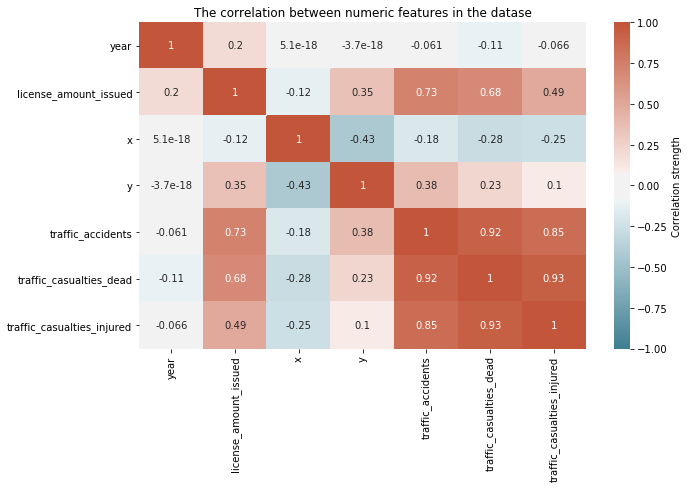

In [58]:
fig, ax = plt.subplots(figsize=(10,6))
cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
sns.heatmap(df.corr(),cmap=cmap, cbar_kws={'label': 'Correlation strength'},vmin=-1,vmax=1,annot=True)
plt.title("The correlation between numeric features in the datase")
plt.show()
# The darker the color, the stronger the relation. i believe this color scheme helps find strong correlations easier

#### Define a custom function to subplot histograms

We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

C:\Users\baghl\.conda\envs\AI_Playground\lib\site-packages\numpy\lib\histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\baghl\.conda\envs\AI_Playground\lib\site-packages\numpy\lib\histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


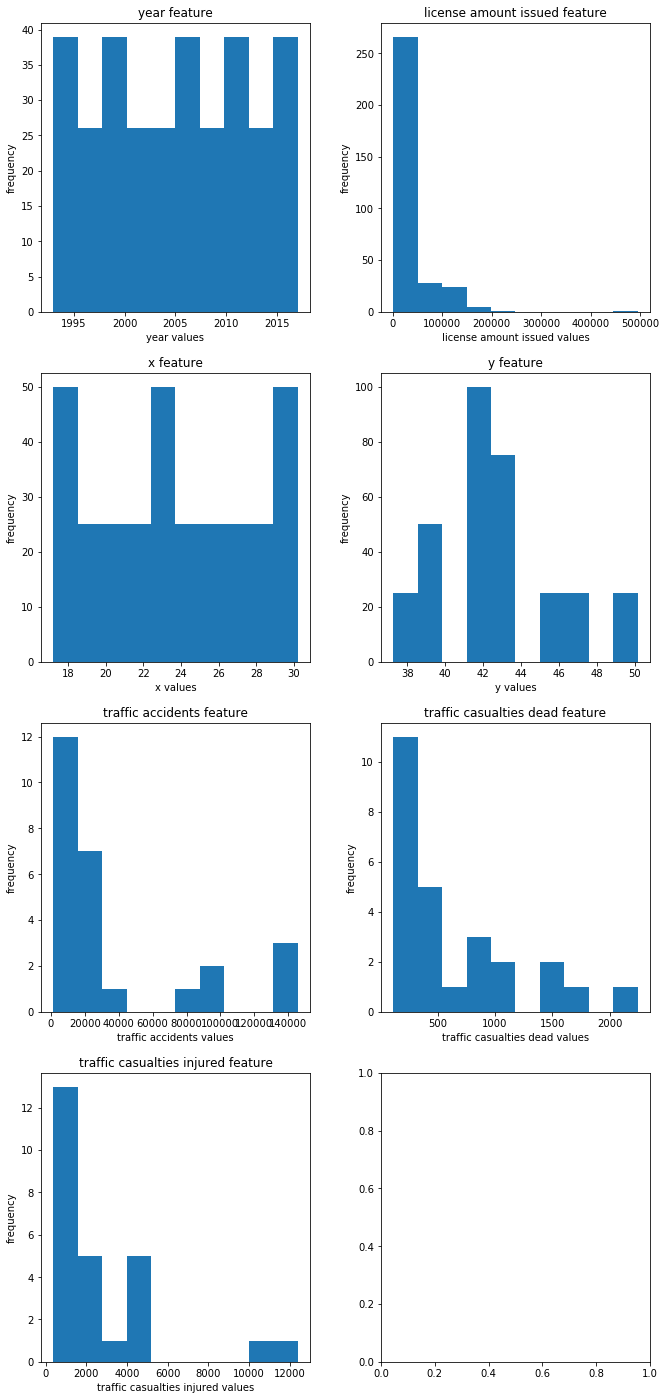

In [59]:

def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    ncols = 2 # i need to use this to find the right figure width
    fig, ax = plt.subplots(nrows=nrows, ncols=2,figsize=(5*ncols,5*nrows)) # You'll want to specify your figsize
    fig.tight_layout(pad=4.0) #put a margin around each subplot to enhance visibility of the labels
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        # Set titles, labels, etc here for each subplot
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(list_of_xlabels[i])
        ax[i].set_ylabel("frequency")

numeric_cols = [key for key in df.columns if df[key].dtype != 'O']
list_of_titles = [name.replace('_',' ')+" feature" for name in numeric_cols] 
list_xlabels = [name.replace('_',' ')+" values" for name in numeric_cols]
subplot_histograms(df,numeric_cols,list_of_titles,list_xlabels)

In [60]:
df.head()

,year,region,license_amount_issued,geo_point_2d,x,y,traffic_accidents,traffic_casualties_dead,traffic_casualties_injured
0,2012,Makkah,143954,"(21.628962766, 41.2636898334)",21.628963,41.26369,NaN,NaN,NaN
1,1994,Makkah,75349,"(21.628962766, 41.2636898334)",21.628963,41.26369,NaN,NaN,NaN
2,1998,Makkah,86082,"(21.628962766, 41.2636898334)",21.628963,41.26369,NaN,NaN,NaN
3,2004,Makkah,86636,"(21.628962766, 41.2636898334)",21.628963,41.26369,NaN,NaN,NaN
4,2005,Makkah,65099,"(21.628962766, 41.2636898334)",21.628963,41.26369,NaN,NaN,NaN


#### Plot and interpret histograms 
For each of the following:
- Driving Licenses number
- Traffic Accidents number

Please plot two additional histograms that will help with your understanding of the data

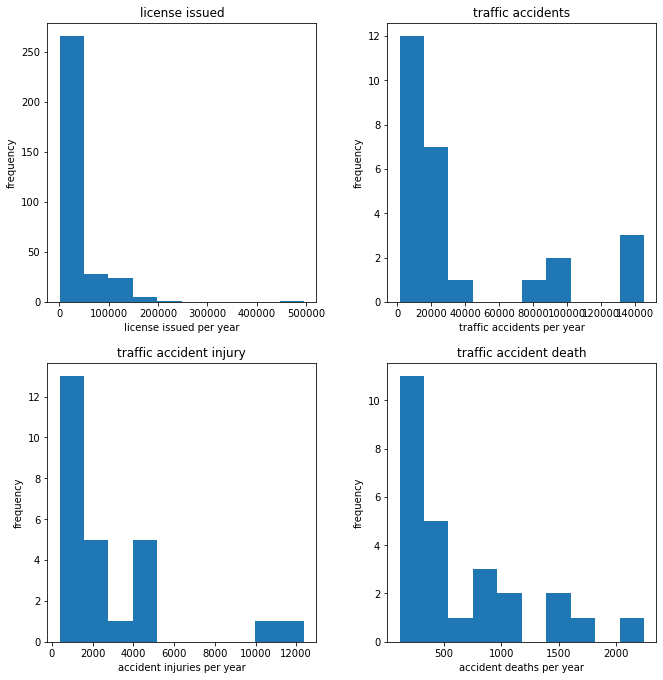

In [61]:
# Code
subplot_histograms(df,["license_amount_issued","traffic_accidents","traffic_casualties_injured","traffic_casualties_dead"],["license issued","traffic accidents","traffic accident injury","traffic accident death"],['license issued per year','traffic accidents per year',"accident injuries per year","accident deaths per year"])

All the plots above seem to have a positive skew. However, as we can see from the plots above, the plots do not make sense much. This is because in some regions, the number of driving licence or accidents are low when comparing with other main regions which makes it difficult to observe the frequency of the distribution of variables. Hence, the best way is to create a density distribution liine for each region to show the frequency of accidents/licenses values over the years.

### -  Driving Licenses number

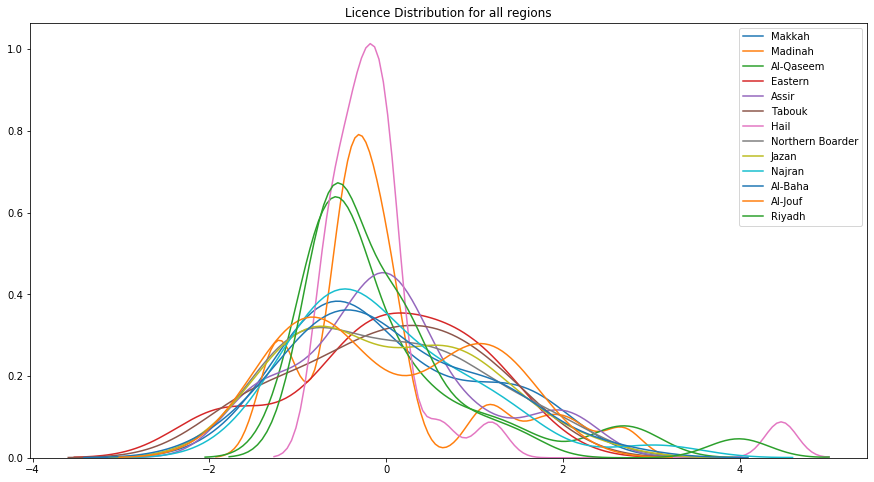

In [62]:
# Here im using seaborn to make a a density distribution plot
def dist_plot(df,val_col,cat_column, specific_cats = None, TS = False, hist=False,rug=False,standardize=True,title=None):
    '''This function creates a density plot for all the regions for a specific column'''
    #get a figure and axis
    fig, ax = plt.subplots(figsize=(15,8))
    
    #if user specified regions, set it. else put all the regions
    unique_cats = df[cat_column].unique() if specific_cats == None else specific_cats
    
    #for each region 
    for category in unique_cats:
        # mask is a dataframe of all row that has the same region of the value specified
        mask = df.loc[df[cat_column] == category][[val_col]].dropna()
        if mask.shape[0] > 0: # in case there is no result
            
            #scale it only if specified by user
            scaler = StandardScaler()
            seq = scaler.fit_transform(mask) if standardize else mask
            title = title if not None else ""
            #plot
            sns.distplot(seq, hist=hist, rug=rug,label = category,ax=ax).set_title(title)
        
            plt.legend()

    plt.show()

dist_plot(df,"license_amount_issued",'region', standardize=True, title='Licence Distribution for all regions')

In the above plot, we can notice some regions' distribution follow a positive skew, others are close to normal and some look like bimodal. However its difficult to see anything thru these spagetti lines above so below i will group regions that have similar distributions together and analyze them.

To do so, first i will create a function to separate positive, negative and normal distributions, then plot them separately

In [63]:


def classify_distribution(df,val_col,cat_column, specific_cats = None,standardize=True):
    '''This function runs a normality test using the p-value. The threshold is set to 0.05'''
    result = []
    # put in all region if user did not specify
    unique_cats = df[cat_column].unique() if specific_cats == None else specific_cats
    for category in unique_cats:
        # get all the values that has the same region and normalize if user asked to
        values = df.loc[df[cat_column] == category][[val_col]].dropna()
        values = scaler.fit_transform(values) if standardize else values
        
        # run normality test >> reference:#http://mathforum.org/library/drmath/view/72065.html
        if stats.normaltest(values)[-1] > 0.05: 
            # if test succeeds it means it is normal
            result.append((category,0))
        elif values.skew()[0] > 0:
            # this means it is positively skewed
            result.append((category,1))
        elif values.skew()[0] < 0:
            # this means it is negatively skewed
            result.append((category,-1))

    return result


# classifying the license_amount_issued column distribution of each region  
distributions = classify_distribution(df,"license_amount_issued",'region', standardize=False)
distributions # has each region and type of distribution 


[('Makkah', 0),
 ('Madinah', 1),
 ('Al-Qaseem', 1),
 ('Eastern', 0),
 ('Assir', 0),
 ('Tabouk', 0),
 ('Hail', 1),
 ('Northern Boarder', 0),
 ('Jazan', 0),
 ('Najran', 1),
 ('Al-Baha', 0),
 ('Al-Jouf', 1),
 ('Riyadh', 1)]

In [64]:
#separating them based on distribution type 
neg, norm, pos = [],[],[]
for region, skew in distributions:
    if skew == 1:
        pos.append(region)
    elif skew == 0:
        norm.append(region)
    else:
        neg.append(region)
print("Negative skew: {}\nNormal Distribution: {}\nPositive skew: {}".format(neg,norm,pos))    


Negative skew: []
Normal Distribution: ['Makkah', 'Eastern', 'Assir', 'Tabouk', 'Northern Boarder', 'Jazan', 'Al-Baha']
Positive skew: ['Madinah', 'Al-Qaseem', 'Hail', 'Najran', 'Al-Jouf', 'Riyadh']


Since there are no region with a negative skew found, we will only be plotting normal and positive

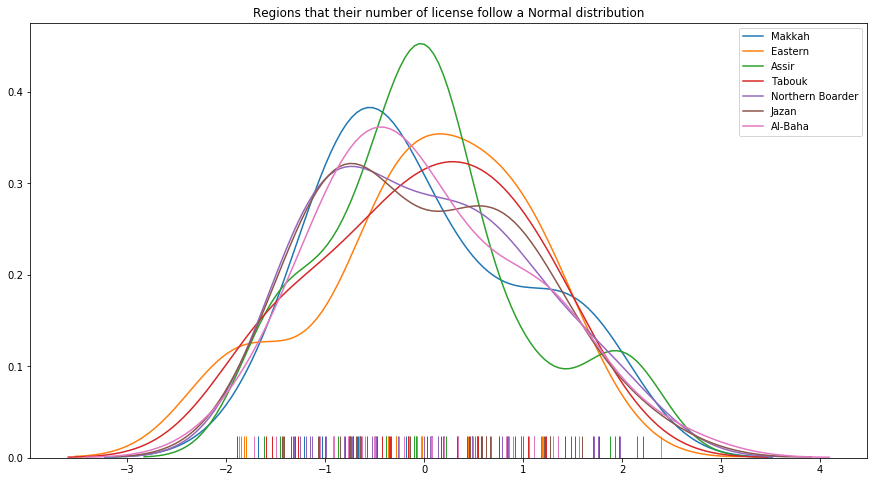

In [65]:
dist_plot(df,"license_amount_issued",'region',norm,hist=False,standardize=True,rug=True,title="Regions that their number of license follow a Normal distribution")

Regions are Makkah, Eastern, Assir, Tabouk, Northern Boarder, Jizan and Al-Baha
- These regions failed to reject the null hypothesis (that the region data follow a normal distribution)
- Some regions such as Jazan and Assir might look like they are almost a multimodal
- The rug plot (mini vertical lines at x axes) shows that data concentration is at the middle

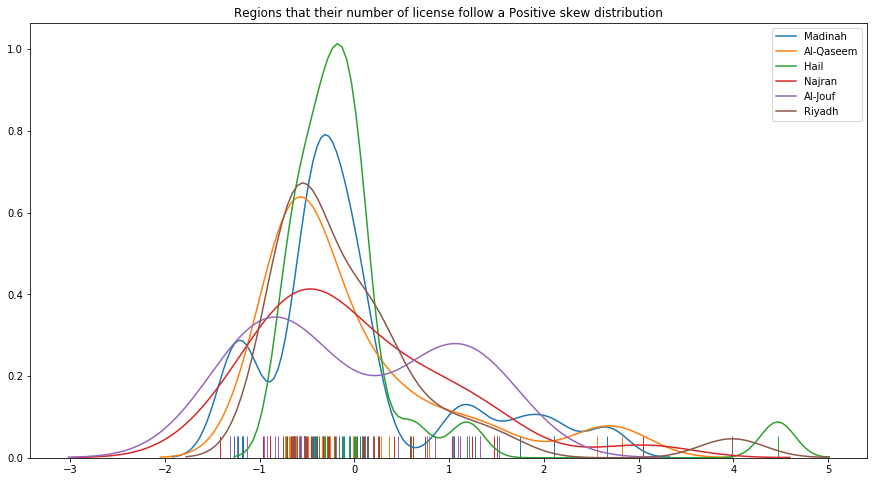

In [66]:
dist_plot(df,"license_amount_issued",'region',pos,hist=False,standardize=True,rug=True,title="Regions that their number of license follow a Positive skew distribution")

Regions are Madina, Al-Qaseem, Hail, Najran, Al-Jouf and Riyadh
- These regions rejectced the null hypothesis (that the region data follow a normal distribution) and tested positive for skew test
- However, Al-Jouf looks exactly like a multimodal distribution although it was classified as positive as it has two peaks 
- The rug plot (mini vertical lines at x axes) shows that data concentration is at the left and the more you go further to the right, concentration decreases.

### -  Traffic Accidents number

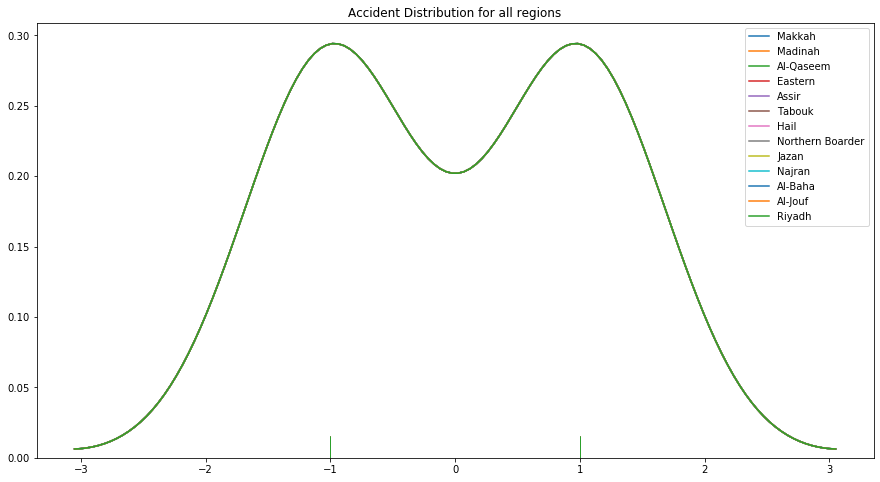

In [67]:
dist_plot(df,"traffic_accidents",'region', standardize=True,rug=True, title='Accident Distribution for all regions')

 Plotting per region doesn make sense anymore due to the lack of data (only two enteries per region) as accidents data is only available for two years. This causes the distribution to look like every region follows a bimodal distribution.
The only piece of information i can interpret from the graph above is how much the accidents count varried between 2016 and 2017
- Regions like Najran and Al-Jouf
    * The two values (of 2016 and 2017) are close to each other, indicating that the accidents' counts were less affected by external factors (new regulations, traffic voilation fines, etc...)
- Regions like Riyadh and Makkah
     * The values are far from each other which indicates that external factors (whether it was saher implementation, new regulation, etc...) had a noticable effect on the yearly number of accident
     
Check the plot below to find a clearer difference between the two types of regions discussed above

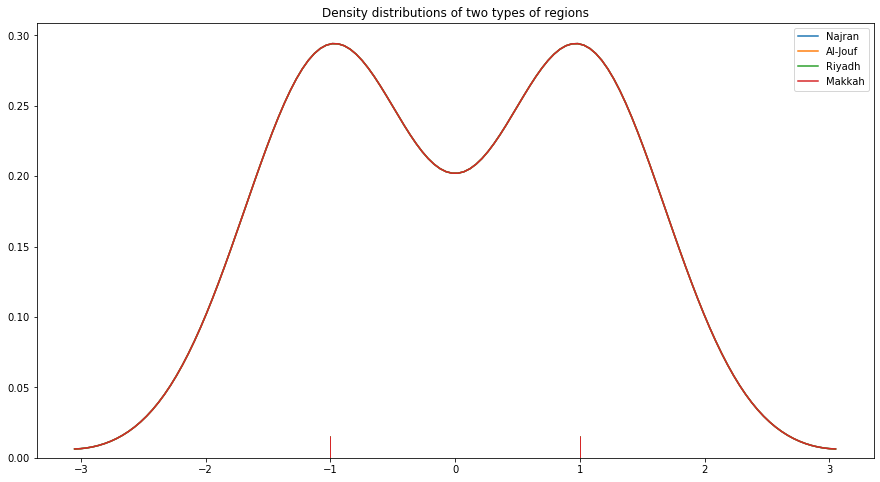

In [68]:

dist_plot(df,"traffic_accidents",'region',['Najran','Al-Jouf','Riyadh','Makkah'], standardize=True,rug=True, title='Density distributions of two types of regions')

Below i tried checking the distribution of the number of accidents per year (each year has a distribution)

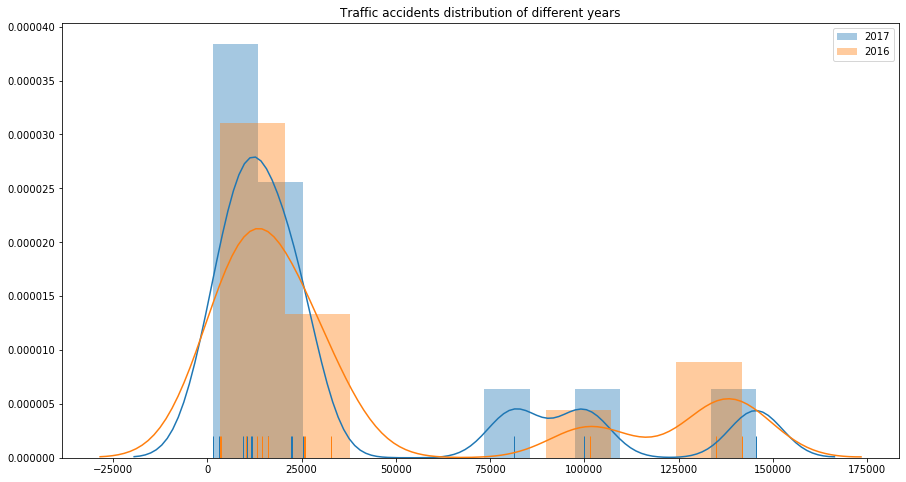

In [69]:
dist_plot(df,"traffic_accidents",'year',rug=True,hist=True,standardize=False, title='Traffic accidents distribution of different years')

- It is difficult to make sense of the data as three clusters can be observed from the histogram bars above
- We can also observe changes in values. for example, there seems to be an increase in some region as the rug plot of the right most cluster shows that there is an entery in 2017 which is higher than two previous enteries in 2016. However, checking the increase and reduction percentages per year for each region is a brighter idea.

Below i will calculate the percentage of difference between the two years for each region

In [70]:
# make a dataframe which only includes year, region and accidents count for 2016 and 2017
#sort_values will come into play later when plotting the percentage on each bar by index
g = df.loc[df.year.isin([2016,2017])][['year','region','traffic_accidents']].sort_values('region')
# pivoting the table to make each region as the index and each year is a column (2016 and 2017 only in this case)
gg = pd.pivot(g,index= 'region',columns='year', values='traffic_accidents')
percentage = ((gg[2017]-gg[2016])/ gg[2016])
# percentage is the percentage of increase/ reduction of the number of accidents in 2017 from 2016



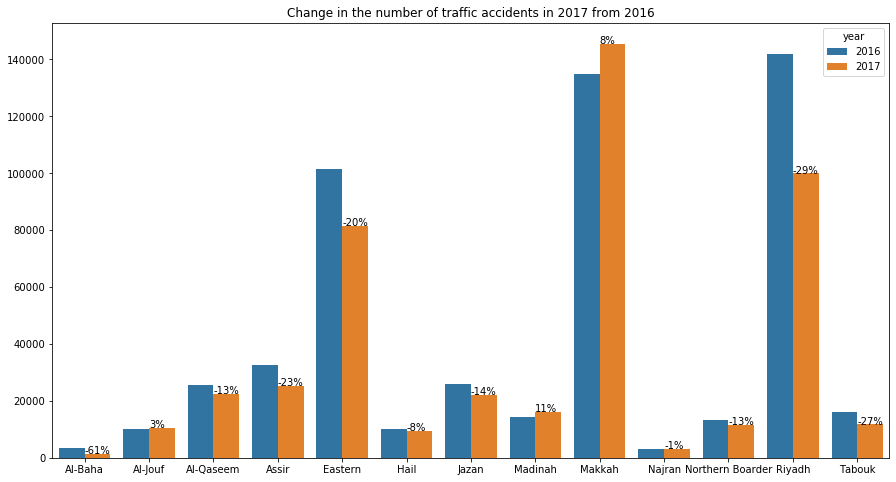

In [71]:
def bar_with_percentage(df,x,y,hue,percentage,ylabel = None, xlabel=None, title=None):
    # making a plot
    fig, ax = plt.subplots(figsize=(15,8))
    # putting a barplot in
    gx =sns.barplot(x=x,y=y,hue=hue,data=df,ax=ax)
    # the mess below is to create a text label on top of each 2017 bar to put the drop/increase percentage
    # this will not work without sorting the dataframe (g) by region
    for idx, region in enumerate(percentage.index):
        # here im calculating the height of each orange bar to use as the y-axis coordinate of the text
        y = g[(g.year == 2017) & (g['region'] == region)]['traffic_accidents']
        # add the percentage as text at its correct spot
        ax.text(idx,y,"{:.0%}".format(percentage[region]),ha="left") 
        ax.set(title= title if title is not None else "", xlabel= xlabel if xlabel is not None else "",ylabel= ylabel if ylabel is not None else "")
        
bar_with_percentage(g,'region','traffic_accidents','year',percentage,title='Change in the number of traffic accidents in 2017 from 2016')

From the bar graph above, we can clearly see how the number of accidents changed from 2016 to 2017
- Greatest region of 2017:
    * Al-Baha: There was roughly a 61% reduction in traffic accidents in this region.
- positive regions of 2017:
    * Tabouk, Riyadh, Northern Boarder, Jazan, Hail, Eastern region, Assir and Al-Qaseem
    * These regions had a reduction in the number of accidents between 13% to 29% in 2017 from 2016 
- Unaffected regions of 2017:
    * Al-Jouf and Najran
    * The reduction/increase percentage in these two regions are very minor (up to 3% difference)
- Naughty regions of 2017:
    * Makkah and Madinah
    * These regions had an increase in the number of accidents with a minimum rate of 8% and maximum of 11% in 2017 from 2016
 

#### Plot and interpret scatter plots

For each of the following:
- Driving Licenses vs. Traffic Accidents for 2017
- Driving Licenses vs. Traffic Accidents for 2016
- Driving Licenses for 2016 vs 2017
- Traffic Accidents for 2016 vs 2017

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


### Driving Licenses vs. Traffic Accidents for 2017

In [72]:
# Code
# getting data for only 2017 to make the first plot
processed_df = df[(df["year"] == 2017) & (df["license_amount_issued"].notna()) & (df["traffic_accidents"].notna())][['year','license_amount_issued','traffic_accidents','region']].reset_index(drop=True)

processed_df.head()

,year,license_amount_issued,traffic_accidents,region
0,2017,22035,9379.0,Hail
1,2017,5280,11540.0,Northern Boarder
2,2017,6318,22405.0,Al-Qaseem
3,2017,126816,81433.0,Eastern
4,2017,10232,11713.0,Tabouk


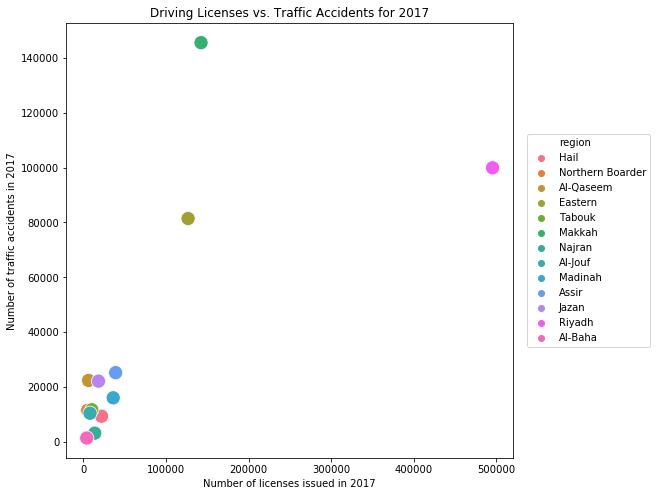

In [73]:
fig, ax = plt.subplots(figsize=(8,8))
sns.scatterplot(processed_df.license_amount_issued,processed_df.traffic_accidents, hue=processed_df.region, ax=ax,s=200)
ax.set_title('Driving Licenses vs. Traffic Accidents for 2017')
ax.set_xlabel("Number of licenses issued in 2017")
ax.set_ylabel("Number of traffic accidents in 2017")
#ax.set(ylim=(0,500_000))
ax.legend(loc='center left', bbox_to_anchor=(1.02, 0.5))
plt.show()

From the scatterplot above, we can interpret:
* The more a point is increasing in the x-axis, the more licenses were issued in 2017 for that region
* The more the the point increases in the y-axis, the more accidents happened in 2017 for that region

However, some regions have many licenses issued and a huge number of accidents which distorted the x and y axis ranges causing the scatterplot to be difficult to interpret.

Below i will attempt to solve this by making two new columns (accident to license ratio and license to accident ratio) and use it to plot the scatter plot


In [74]:
processed_df['license_to_accidents'] = processed_df.traffic_accidents/processed_df.license_amount_issued
processed_df['accidents_to_license'] = processed_df.license_amount_issued/processed_df.traffic_accidents
processed_df.head(2)

,year,license_amount_issued,traffic_accidents,region,license_to_accidents,accidents_to_license
0,2017,22035,9379.0,Hail,0.425641,2.349398
1,2017,5280,11540.0,Northern Boarder,2.185606,0.457539


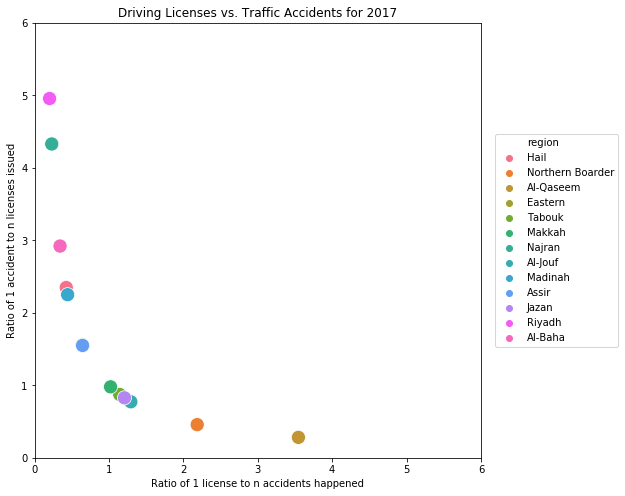

In [75]:
fig, ax = plt.subplots(figsize=(8,8))
sns.scatterplot(processed_df.license_to_accidents,processed_df.accidents_to_license, hue=processed_df.region,s=200)
ax.set_title('Driving Licenses vs. Traffic Accidents for 2017')
ax.set_ylabel("Ratio of 1 accident to n licenses issued")
ax.set_xlabel("Ratio of 1 license to n accidents happened")
ax.legend(loc='center left', bbox_to_anchor=(1.02, 0.5))
ax.set(ylim=(0,6),xlim=(0,6))
plt.show()

The scatter above is not affected by the size of regions (larger regions have larger values in both license and accidents) as it was normalized (plotting the ratio instead of raw numbers). Since the question requested a scatterplot, therefore i created both ratios. however, one is required only if we do not want to plot a scatterplot 

From the scatterplot above we can interpret the following:
* The most problematic two regions are Al-Qaseem and Northern Boarder
    - there are around 3.5 and 2.1 accidents in that region for each license issued from the two regions respectively.
* The least  problematic two regions are Riyadh and Najran 
    - There are around 5 and 4.5 licenses issued for each accident happened in the two regions respectively.

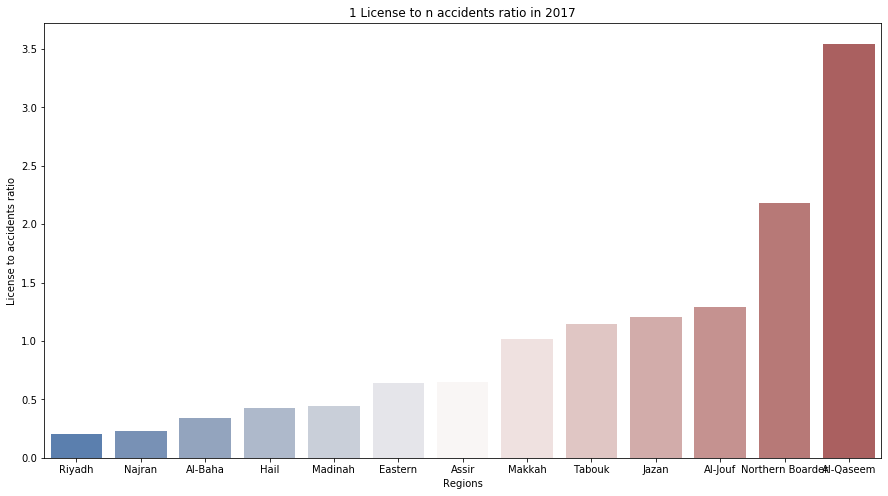

In [76]:
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(data=processed_df.sort_values('license_to_accidents'),y="license_to_accidents",x='region',ax=ax,palette="vlag")
ax.set_xlabel("Regions")
ax.set_ylabel("License to accidents ratio")
ax.set(title="1 License to n accidents ratio in 2017")
plt.show()


Above is a plot with using only License to accidents ratio. The higher the bar the more accidents happened in the region per 1 license issued from the region in 2017

### Driving Licenses vs. Traffic Accidents for 2016

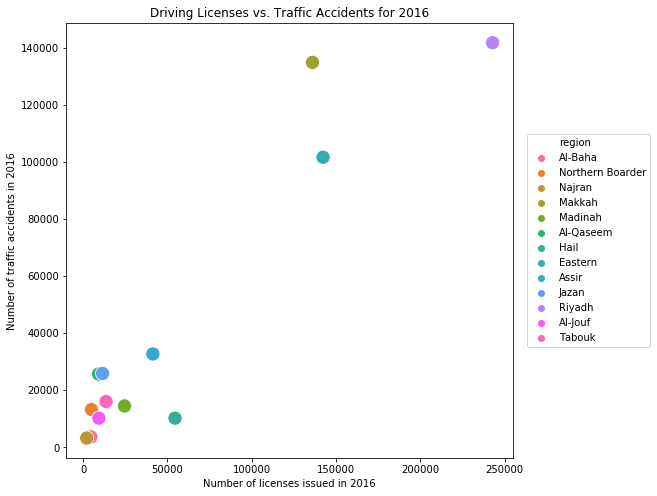

In [77]:
fig, ax = plt.subplots(figsize=(8,8))
processed_df16 = df[(df["year"] == 2016) & (df["license_amount_issued"].notna()) & (df["traffic_accidents"].notna())][['year','license_amount_issued','traffic_accidents','region']]
sns.scatterplot(processed_df16.license_amount_issued,processed_df16.traffic_accidents, hue=processed_df16.region, ax=ax,s=200)
ax.set_title('Driving Licenses vs. Traffic Accidents for 2016')
ax.set_xlabel("Number of licenses issued in 2016")
ax.set_ylabel("Number of traffic accidents in 2016")
ax.legend(loc='center left', bbox_to_anchor=(1.02, 0.5))
plt.show()

This plot has the same problem as the question above, hence same procedures will be followed.

In [78]:
#making a normalized variable which is a ratio of 1 license to n accidents and the opposite
processed_df16['license_to_accidents'] = processed_df16.traffic_accidents/processed_df16.license_amount_issued
processed_df16['accidents_to_license'] = processed_df16.license_amount_issued/processed_df16.traffic_accidents
processed_df16.head(2)

,year,license_amount_issued,traffic_accidents,region,license_to_accidents,accidents_to_license
50,2016,4614,3618.0,Al-Baha,0.784135,1.27529
107,2016,4958,13196.0,Northern Boarder,2.661557,0.37572


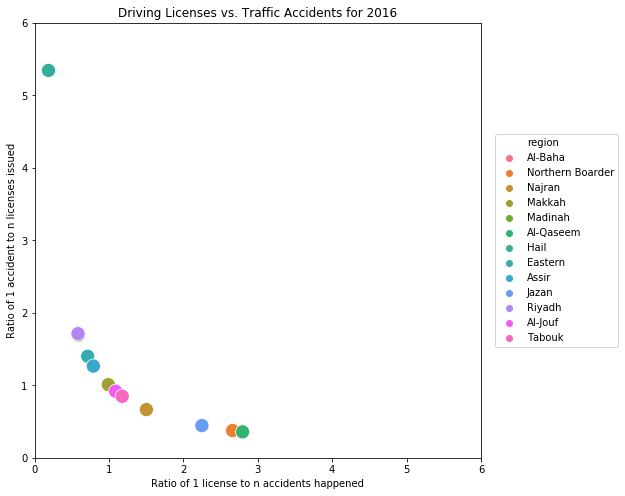

In [79]:
fig, ax = plt.subplots(figsize=(8,8))
sns.scatterplot(processed_df16.license_to_accidents,processed_df16.accidents_to_license, hue=processed_df16.region,s=200)
ax.set_title('Driving Licenses vs. Traffic Accidents for 2016')
ax.set_ylabel("Ratio of 1 accident to n licenses issued")
ax.set_xlabel("Ratio of 1 license to n accidents happened")
ax.legend(loc='center left', bbox_to_anchor=(1.02, 0.5))
ax.set(ylim=(0,6),xlim=(0,6))
plt.show()

From the scatterplot above we can interpret the following:
* The most problematic two regions in 2016 were Al-Qaseem and Northern Boarder
    - there are around 2.8 and 2.6 accidents in that region for each license issued from the two regions respectively.
* Hail was the most peaceful region from accidents
    - Hail significantly exceeded every other region with a ratio of around 5.2 licenses issued per each accident in the region

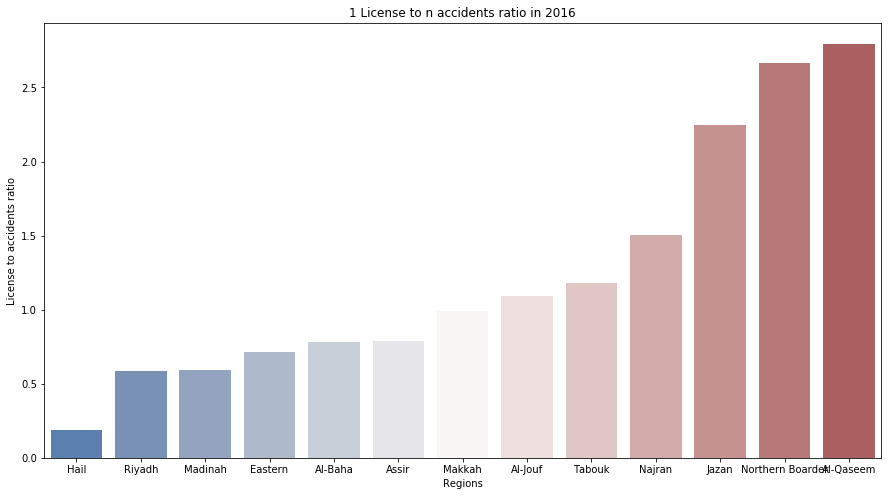

In [80]:
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(data=processed_df16.sort_values('license_to_accidents'),y="license_to_accidents",x='region',ax=ax,palette="vlag")
ax.set_xlabel("Regions")
ax.set_ylabel("License to accidents ratio")
ax.set(title="1 License to n accidents ratio in 2016")
plt.show()

Above is a plot with using only License to accidents ratio. The higher the bar the more accidents happened in the region per 1 license issued from the region in 2017

### Driving Licenses for 2016 vs 2017

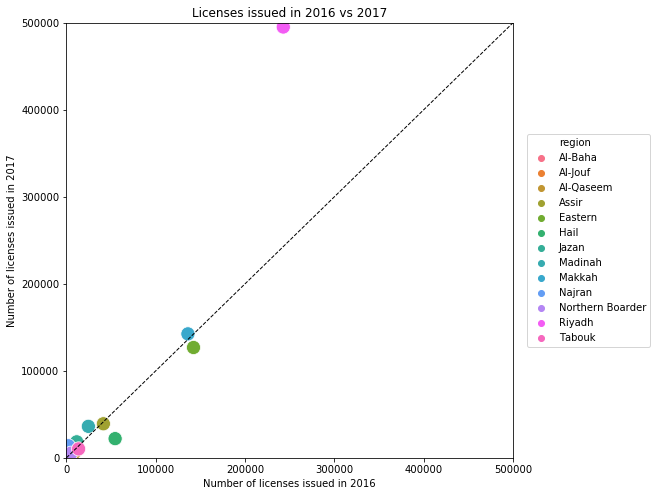

In [81]:
# getting only years of 2016 and 2017
license_16_17 = df[(df["year"] == 2016) | (df['year'] == 2017)][['year','region','license_amount_issued']]
# pivot to make the year as column
license_16_17 = license_16_17.pivot("region" ,columns='year',values=['license_amount_issued'])
# re-adjusting the columns names
license_16_17.columns = license_16_17.columns.droplevel([0])
# move region to column rather than index
license_16_17.reset_index(inplace=True)

fig, ax = plt.subplots(figsize=(8,8))
sns.scatterplot(license_16_17[2016], license_16_17[2017],hue=license_16_17['region'], ax=ax,s=200)
ax.set_title('Licenses issued in 2016 vs 2017')
ax.set_xlabel("Number of licenses issued in 2016")
ax.set_ylabel("Number of licenses issued in 2017")
ax.legend(loc='center left', bbox_to_anchor=(1.02, 0.5))
ax.set(ylim=(0,500000),xlim=(0,500000))

points = np.linspace(0, 500000, 100)
plt.gca().plot(points, points, color='k', marker=None,
            linestyle='--', linewidth=1.0)
plt.show()

The more the region goes further above the diagonal line, the more license it issued in 2017 compared to 2016

The more the region goes further below the diagonal line, the less license it issued in 2017 compared to 2016

For example:
* Riyadh issued significantly more license in 2017 compared to 2016
* Hail had the highest rate of reduction in license issuance in 2017 compared to 2016

###  Traffic Accidents for 2016 vs 2017

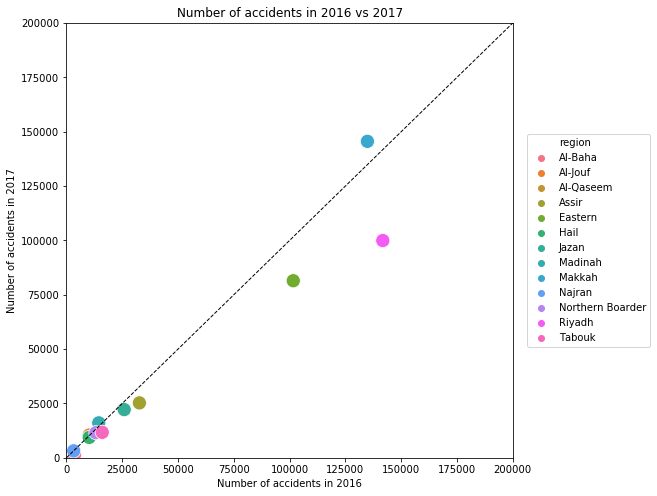

In [82]:
# getting only years of 2016 and 2017
accident_16_17 = df[(df["year"] == 2016) | (df['year'] == 2017)][['year','region','traffic_accidents']]
# pivot to make the year as column
accident_16_17 = accident_16_17.pivot("region" ,columns='year',values=['traffic_accidents'])
# re-adjusting the columns names
accident_16_17.columns = accident_16_17.columns.droplevel([0])
# move region to column rather than index
accident_16_17.reset_index(inplace=True)

fig, ax = plt.subplots(figsize=(8,8))
sns.scatterplot(accident_16_17[2016], accident_16_17[2017],hue=accident_16_17['region'], ax=ax,s=200)
ax.set_title('Number of accidents in 2016 vs 2017')
ax.set_xlabel("Number of accidents in 2016")
ax.set_ylabel("Number of accidents in 2017")
ax.set(ylim=(0,200000),xlim=(0,200000))
ax.legend(loc='center left', bbox_to_anchor=(1.02, 0.5))

points = np.linspace(0, 200000, 100)
plt.gca().plot(points, points, color='k', marker=None,
            linestyle='--', linewidth=1.0)
plt.show()

The more the region goes further above the diagonal line, the more accidents it had in 2017 compared to 2016

The more the region goes further below the diagonal line, the less accidents it had in 2017 compared to 2016

For example:
* Riyadh had less accidents in 2017 compared to 2016
* Makkah had more accidents in 2017 compared to 2016

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

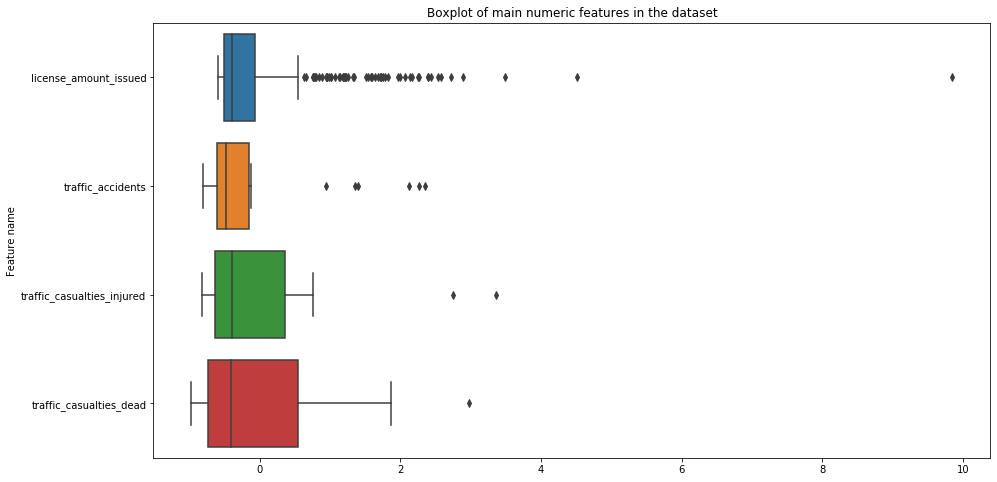

In [83]:
fig, ax = plt.subplots(figsize=(15,8))
scaler = StandardScaler()
scaled = pd.DataFrame(scaler.fit_transform(df[["license_amount_issued","traffic_accidents","traffic_casualties_injured","traffic_casualties_dead"]]),columns=["license_amount_issued","traffic_accidents","traffic_casualties_injured","traffic_casualties_dead"]) 
sns.boxplot(data=scaled,orient='h',ax=ax)
ax.set(title='Boxplot of main numeric features in the dataset',ylabel='Feature name')
plt.show()

From the boxplot above it seems that traffic_causualties_dead, traffic_casualties_injured and license_amount_issued have data less distributed in the first quarter (till 25%) when compaired to the spread in the last quarter (75% - 100%)


The boxplot above looks fishy as there are many datapoints classified as outlier for license_amount_issued feature. I believe this could be due to the difference in the drastic varience in the scale of the regions (Makkah, Riyadh have significantly higher values than some small regions). To solve this, i will attempt to make a boxplot for each region in each feature below.

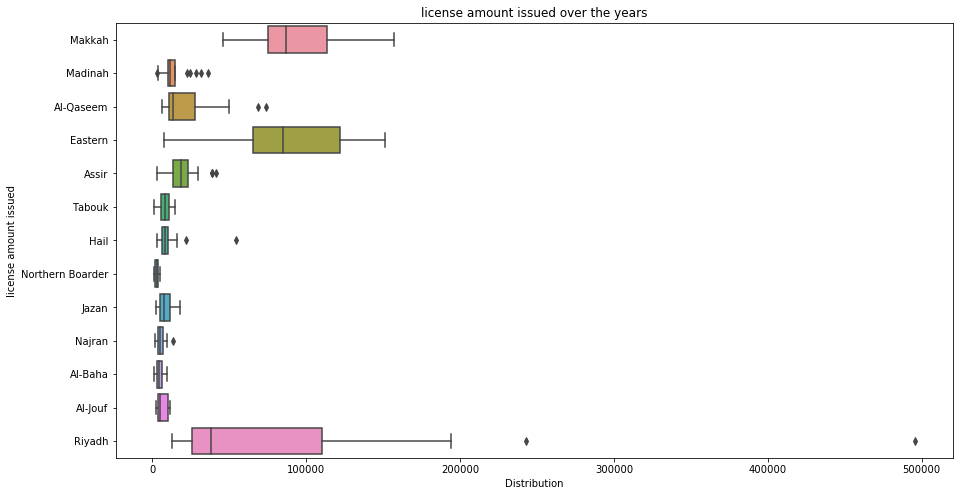

In [84]:
# Code
# some values are numeric but it doesnt make sense to plot them. for example, year, x and y columns
# however, since the question asked for all numeric types, i will plot them separately just to comply with the requirements


def box_plot(df,feature,title=None,x_label=None, y_label=None,xlim=None,ylim=None, regions = None,standerdize=False):
    fig, ax = plt.subplots(figsize=(15,8))
    scaler = StandardScaler()
    # only scale if specified by user else dont
    scaled = pd.DataFrame(scaler.fit_transform(df[[feature]]),columns=[feature]) if standerdize is True else df.copy()[[feature]]
    
    #re adding region column
    scaled['region'] = df['region']
    
    # region_list will contain regions that user specified or all the regions otherwise
    region_list = regions if regions is not None else df['region'].unique()
    sns.boxplot(data=scaled[scaled.region.isin(region_list)],orient='h',x=feature,y='region',ax=ax)
    
    # This is just to set whatever user specified
    title = title if title is not None else ""
    x = x_label if x_label is not None else "Distribution"
    y = y_label if y_label is not None else "Region name"

    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set(title=title)
    if xlim is not None:
        ax.set(xlim=xlim)
    if ylim is not None:
        ax.set(ylim=ylim)
box_plot(df,'license_amount_issued','license amount issued over the years', y_label='license amount issued')

We can see from the above boxplot that there are three regions in license_amount_issued feature that have large varience which could affect the others. Hence, below i will separate them.

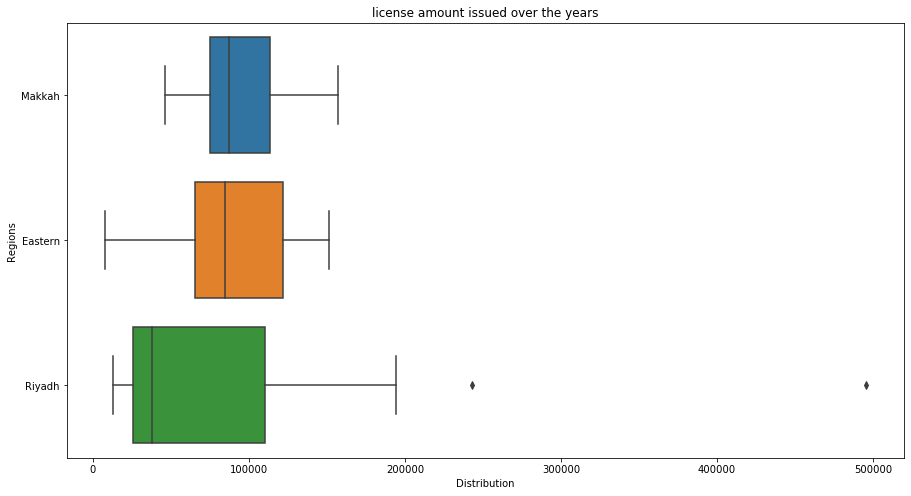

In [85]:
large_scale_regions = ['Makkah','Eastern','Riyadh']
box_plot(df,'license_amount_issued','license amount issued over the years', y_label='Regions',regions=large_scale_regions)

Above is a box plot of all license amount records in the dataset. These three regions were plotted together as they distort the boxplot of other regions due to its large range.
* Eastern region has the lowest number of license issued (when comparing these 3 regions only) in a year in one of its record 
* data in the Makkah region varries the least followed by Eastern region then Riyadh
* Riyadh has an extremely high records to the point that the boxplot considered it as an outlier 
* Note that the skewness was discussed in a previous question


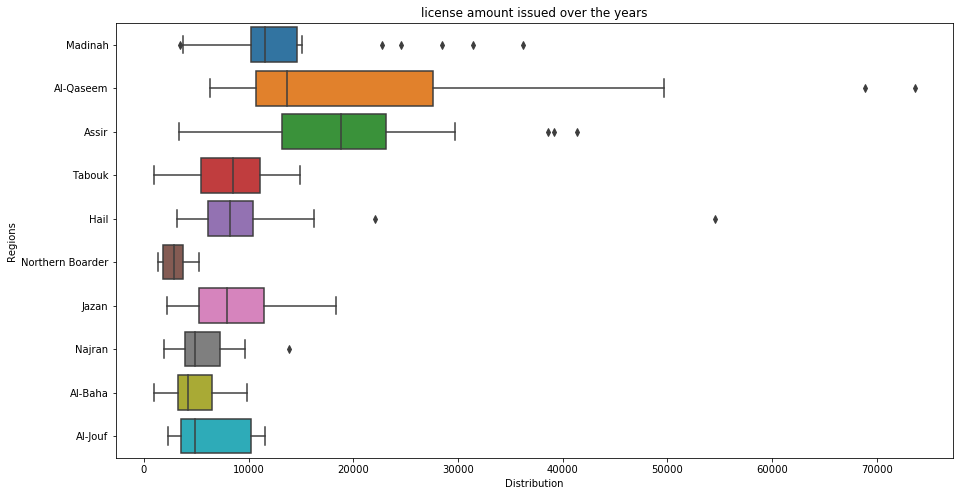

In [86]:
# Systematically getting the remaining regions to plot them
# get all regions
regions = df.region.unique()
# convert to np.array
large_scale_regions = np.array(large_scale_regions)

# small regions is a region that is not in large_scale_regions
small_regions = np.setdiff1d(regions,large_scale_regions)

#plot
box_plot(df,'license_amount_issued','license amount issued over the years', y_label='Regions',regions=small_regions)

Above is a box plot of all license amount records in the dataset of the remaining regions. 
* Tabouk and Al-Baha regions have two of the lowest number of license issued in a year in one of their records
* data in the Northern Boarder region varries the least followed by Najran and Al-Baha
* Al-Qaseem records has a high varience of all the other regions in the plot
* Note that the skewness was discussed in a previous question


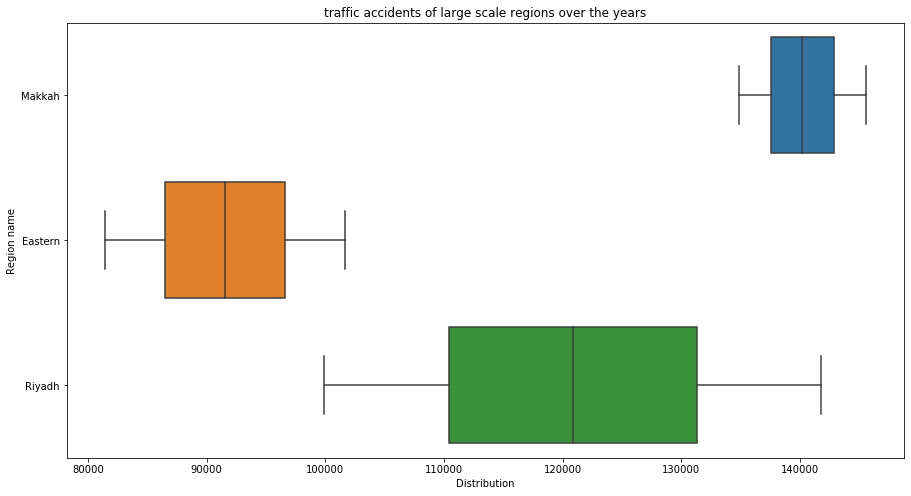

In [87]:


box_plot(df,'traffic_accidents','traffic accidents of large scale regions over the years',regions=large_scale_regions)

When plotting a boxplot of the accident enteries over the year for each region, we will observe that they all look like they follow a normal distribution. However, if we plot a histogram, we will observe that it looks like a bimodal distribution. This is because there are only two records (2 rows) per each region.

In this case, the only useful information is the varience and min, max values of each region
* Eastern region has the minimum accidents in one of it's rows when comparing these three regions while makkah has the maximum
* Riyadh region has the most varience in its records followrd by the eastern region then makkah


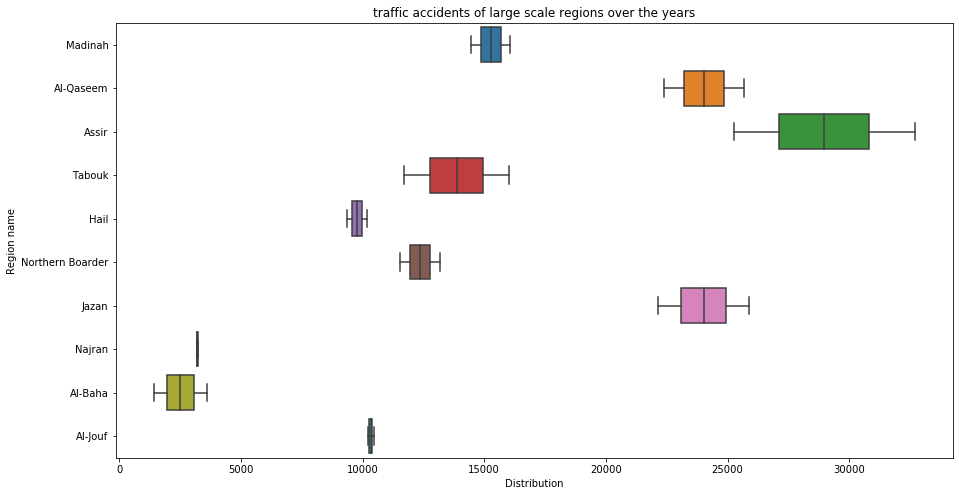

In [88]:
box_plot(df,'traffic_accidents','traffic accidents of large scale regions over the years',regions=small_regions)

The plot above contains the rest of the regions 
* Al-Baha has the minimum accidents in one of it's rows while Assir has the maximum when only comparing these regions
* Assir region has the most varience in its records while Najran has the least.

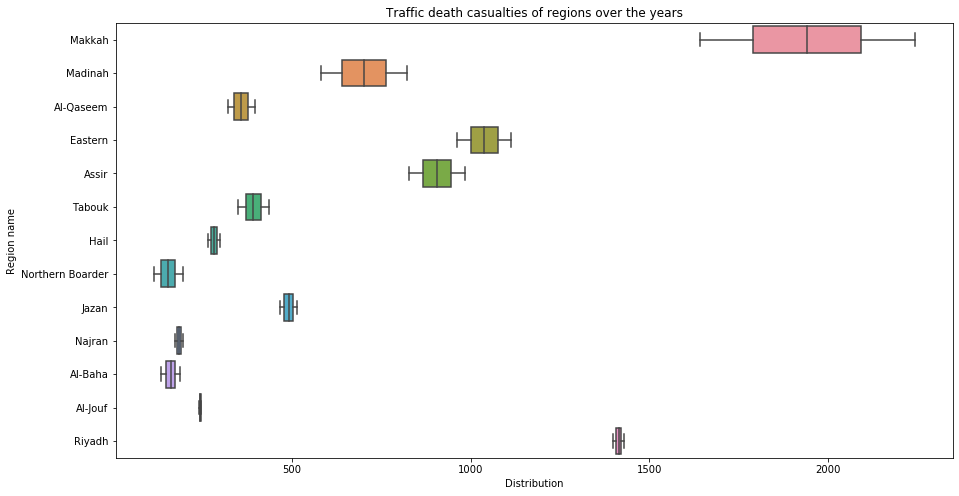

In [89]:
box_plot(df,'traffic_casualties_dead','Traffic death casualties of regions over the years')

The plot above is for all of the regions
* Northern boarder has the minimum death casualties in one of it's rows while Makkah has the maximum
* Makkah region has the most varience in its records while Al-Jouf has the least.

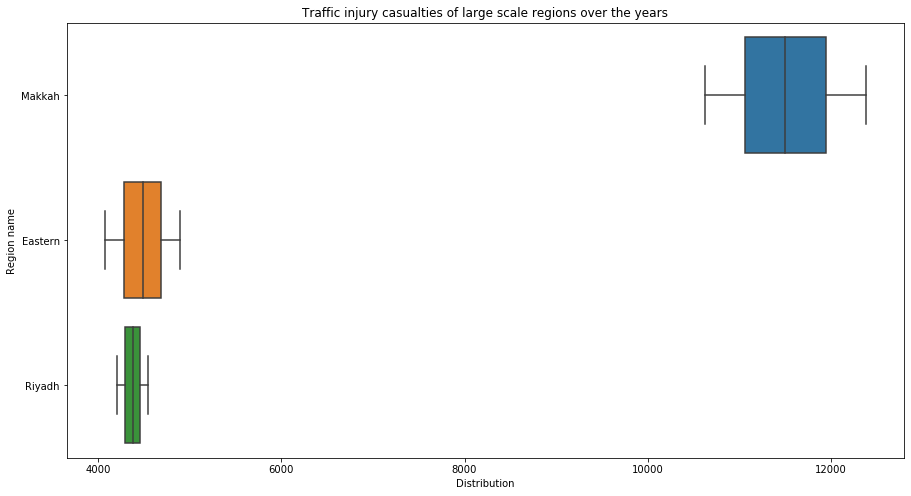

In [90]:
box_plot(df,'traffic_casualties_injured','Traffic injury casualties of large scale regions over the years',regions=large_scale_regions)

The plot above is for large scale regions
* Eastern has the minimum injury casualty in one of it's rows while Makkah has the maximum
* Makkah region has the most varience in its records while Riyadh has the least.

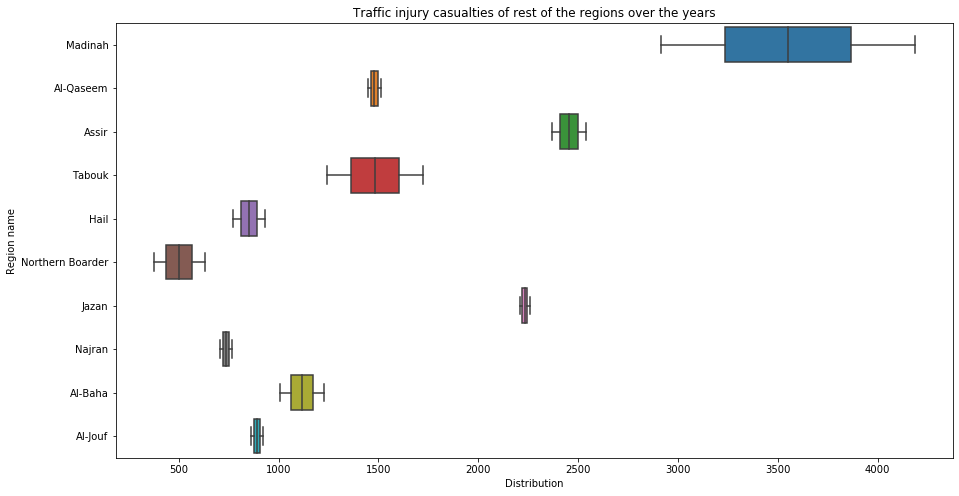

In [91]:
box_plot(df,'traffic_casualties_injured','Traffic injury casualties of rest of the regions over the years',regions=small_regions)

The plot above is for the remaining regions
* Northern boarder has the minimum injury casualty in one of it's rows while Madinah has the maximum
* Madinah region has the most varience in its records while Jazan has the least.

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

I created two additional plots to further explore trends along the way when i was plotting the essencial plots for the tasks. Please check above in the visualization part.

The reason why i placed it above is because it enhances the readibility of the original scatterplot needed for the task and shows additional insight which couldn't be seen clearly from the task's plot. 

Below i would like to go further and analyze the ratio of accident to licenses issued between 2016 and 2017 for all regions 

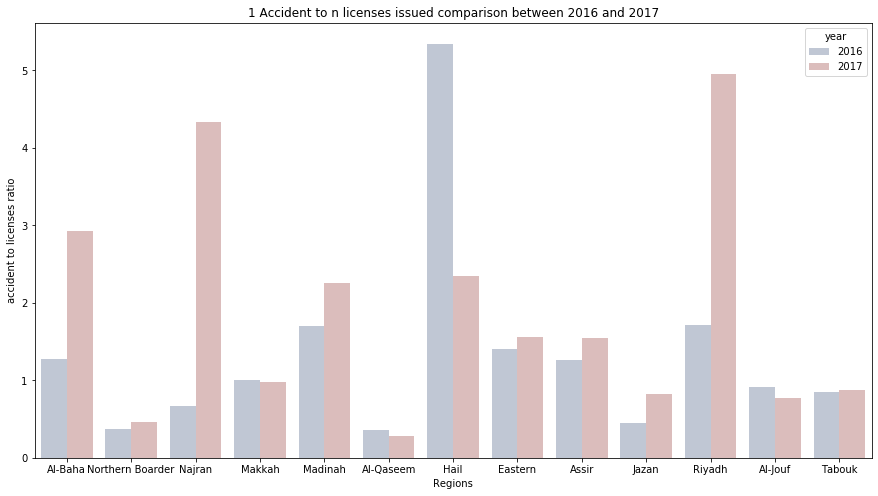

In [92]:
lcpd =processed_df16[['year','region','accidents_to_license']].append(processed_df[['year','region','accidents_to_license']])
lcpd.head()
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(data=lcpd,x='region',y='accidents_to_license',hue='year',ax=ax,palette="vlag")
ax.set_xlabel("Regions")
ax.set_ylabel("accident to licenses ratio")
ax.set(title="1 Accident to n licenses issued comparison between 2016 and 2017")
plt.show()


Here the higher the bar, the more peaceful the region from accidents is. 

From the plot above we can notice information such as:
* Hail accident to license ratio has worsened from 2016 in 2017
* Najran has the highest improvement of accident to license in 2017 from 2016

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [93]:
# Automating analysis
stats = df.describe().T
# finding interquartile range
stats["IQR"] = stats['75%'] - stats['25%']

# for each column
for index in stats.index:
    # testing skewness using the mean and median
    #setting a small margin of error to use use when testing skewness (because its difficult to get a perfect normal dist data in real life)
    margin_of_error = 0.05
    
    #default 
    skewness = "Normally Distributed"
    row = stats.loc[index]
    
    if row['mean'] < row['50%'] - row['std']*margin_of_error:
        skewness = "Negatively skewed"
    elif row['mean'] > row['50%'] + row['std']*margin_of_error:
        skewness = "Positively skewed"        
        
    print("The {} feature ranges from {:.2f} to {:.2f} with a standard deviation of {:.2f} and has an Interquartile range of {:.2f} and is {}\n".format(index,row['min'],row['max'],row['std'],row['IQR'],skewness))

The year feature ranges from 1993.00 to 2017.00 with a standard deviation of 7.22 and has an Interquartile range of 12.00 and is Normally Distributed

The license_amount_issued feature ranges from 915.00 to 495307.00 with a standard deviation of 47419.06 and has an Interquartile range of 20577.00 and is Positively skewed

The x feature ranges from 17.21 to 30.20 with a standard deviation of 4.20 and has an Interquartile range of 7.25 and is Positively skewed

The y feature ranges from 37.26 to 50.15 with a standard deviation of 3.25 and has an Interquartile range of 2.08 and is Positively skewed

The traffic_accidents feature ranges from 1414.00 to 145541.00 with a standard deviation of 46493.71 and has an Interquartile range of 20705.00 and is Positively skewed

The traffic_casualties_dead feature ranges from 112.00 to 2243.00 with a standard deviation of 549.78 and has an Interquartile range of 688.00 and is Positively skewed

The traffic_casualties_injured feature ranges from 374.00

Answers:

* The year feature ranges from 1993.00 to 2017.00 with a standard deviation of 7.22 and has an Interquartile range of 12.00 and is Normally Distributed

* The license_amount_issued feature ranges from 915.00 to 495307.00 with a standard deviation of 47419.06 and has an Interquartile range of 20577.00 and is Positively skewed

* The x feature ranges from 17.21 to 30.20 with a standard deviation of 4.20 and has an Interquartile range of 7.25 and is Positively skewed

* The y feature ranges from 37.26 to 50.15 with a standard deviation of 3.25 and has an Interquartile range of 2.08 and is Positively skewed

* The traffic_accidents feature ranges from 1414.00 to 145541.00 with a standard deviation of 46493.71 and has an Interquartile range of 20705.00 and is Positively skewed

* The traffic_casualties_dead feature ranges from 112.00 to 2243.00 with a standard deviation of 549.78 and has an Interquartile range of 688.00 and is Positively skewed

* The traffic_casualties_injured feature ranges from 374.00 to 12383.00 with a standard deviation of 2922.64 and has an Interquartile range of 2861.00 and is Positively skewed

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer: No. However, when i was plotting the distribution of driving licenses for each region separately using the classify_distribution function in the visualization section, few of the regions had a normal distribution. But when plotting them all together non of them have a normal distribution.

Does This Assumption Hold for:
    - Driving Licenses
    - Traffic Accidents
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer: No, Driving licenses is positively skewed when plotted it without separation (histogram per region). For traffic accident, we only have two enteries per region, for now it is a positive skew as well.

To make an estimate out of the licenses feature, it has to be broken down to regions as some regions have huge values while others have smaller values. This will make the estimate more accurate.

Traffic accidents feature needs more extra data to be used to make estimate, currently we only have two records (2016 and 2017) for each region and there are only 13 regions. this is not enough!

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

Answer: I have run hypothesis testing above in the beginning of the visualization section to test if the distribution of each region in license_amount_issued follows a normal distribution.

* The null hypothesis was that the region distribution follows a normal distribution if it's p value > 0.05
* The null hyppothesis was rejected whenever the p value of the region's distribution gets over 0.05

## Outside Research

Based upon your observations, choose **three** regions that demonstrate interesting trends in the number of driving licenses and traffic accidents. Spend some time doing outside research on provincial and central policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

Answer:

In [94]:
# Here im combining the 2018 records that did not come with the provided dataset
# the newly downloaded dataset
new_accidents = pd.read_csv('../data/saudi-arabia-traffic-accidents-and-casualties-injured-dead-2008.csv',sep=';')
# our old processed one
main_df = pd.read_csv("../data/combined_datasets.csv")
# dropping useless columns
new_accidents.drop(['geo_shape','geo_point_2d'],inplace=True,axis=1)
# convert to lower
new_accidents.columns = [col.lower() for col in new_accidents.columns]
# drop any row that contains Total in region or not for 2018 (we only want 2018 because the rest is already there)
new_accidents.drop(new_accidents[(new_accidents.region == 'Total')| (new_accidents.year != 2018)].index,axis=0,inplace=True)
new_accidents.head()

,year,region,indicator,value
3,2018,Riyadh,No. of Casualties - Injured,4554
4,2018,Jazan,No. of Accidents,19572
8,2018,Madinah,No. of Casualties - Injured,2666
11,2018,Al-Baha,No. of Accidents,1764
13,2018,Asir,No. of Casualties - Dead,696


In [95]:
# reformat the names of regions to be the same
def change_namess(name):
    result = name
    if name == 'Northern Boarder':
        result = 'Northern Borders'
    elif name == 'Assir':
        result = 'Asir'
    elif name == 'Al-Qaseem':
        result= 'Qassim'
    elif name == 'Eastern':
        result = 'Eastern Region'
        
    return result

# double s because there are actually two functions, the appropriate one for this conversion is the double s one
main_df.region = main_df.region.apply(change_namess)
# check for nan values
nan_percentage(new_accidents)

0.0% of the enteries in 'year' feature is mising
0.0% of the enteries in 'region' feature is mising
0.0% of the enteries in 'indicator' feature is mising
0.0% of the enteries in 'value' feature is mising


In [96]:
# Unpacking indicator column and readding its values as columns using pivot
new_accidents = pd.pivot_table(data=new_accidents,index=['region'] ,columns=['indicator'], values=['value'])
new_accidents.columns = new_accidents.columns.droplevel([0])
new_accidents.reset_index(inplace=True)
#adding year because i will be appending it to the main dataframe
new_accidents['year'] = 2018
#rename the columns to look the same to ease the append process
new_accidents.rename(columns={"No. of Accidents": "traffic_accidents", "No. of Casualties - Dead": "traffic_casualties_dead","No. of Casualties - Injured":'traffic_casualties_injured'},inplace=True)
new_accidents.head()

indicator,region,traffic_accidents,traffic_casualties_dead,traffic_casualties_injured,year
0,Al-Baha,1764,111,935,2018
1,Al-Jouf,7355,157,618,2018
2,Asir,25964,696,2192,2018
3,Eastern Region,45077,661,2969,2018
4,Hail,6955,193,912,2018


In [97]:
# appended the processed 2018 records to the main datafram
main_df = main_df.append(new_accidents, ignore_index = True,sort=False) 
# extract the three years traffic accident records
accidents = main_df[(main_df.year.isin([2016,2017,2018]))][["year","region","traffic_accidents"]].sort_values('region')
accidents.head()

,year,region,traffic_accidents
325,2018,Al-Baha,1764.0
50,2016,Al-Baha,3618.0
285,2017,Al-Baha,1414.0
215,2017,Al-Jouf,10469.0
289,2016,Al-Jouf,10212.0


In [98]:
# This block will calculate the percentage of decrease/increase in accidents from the previous year
gg = pd.pivot(accidents,index= 'region',columns='year', values='traffic_accidents')
years = [2016,2017,2018]
percentage = pd.DataFrame({years[i]:((gg[years[i]]-gg[years[i-1]])/ gg[years[i-1]]) for i in range(1,len(years))})
percentage.head()
# here the values column 2017 is the percentage that 2017 accident increased/decreased from 2016

,2017,2018
region,,
Al-Baha,-0.609176,0.247525
Al-Jouf,0.025166,-0.297450
Asir,-0.227604,0.028481
Eastern Region,-0.198644,-0.446453
Hail,-0.080400,-0.258450


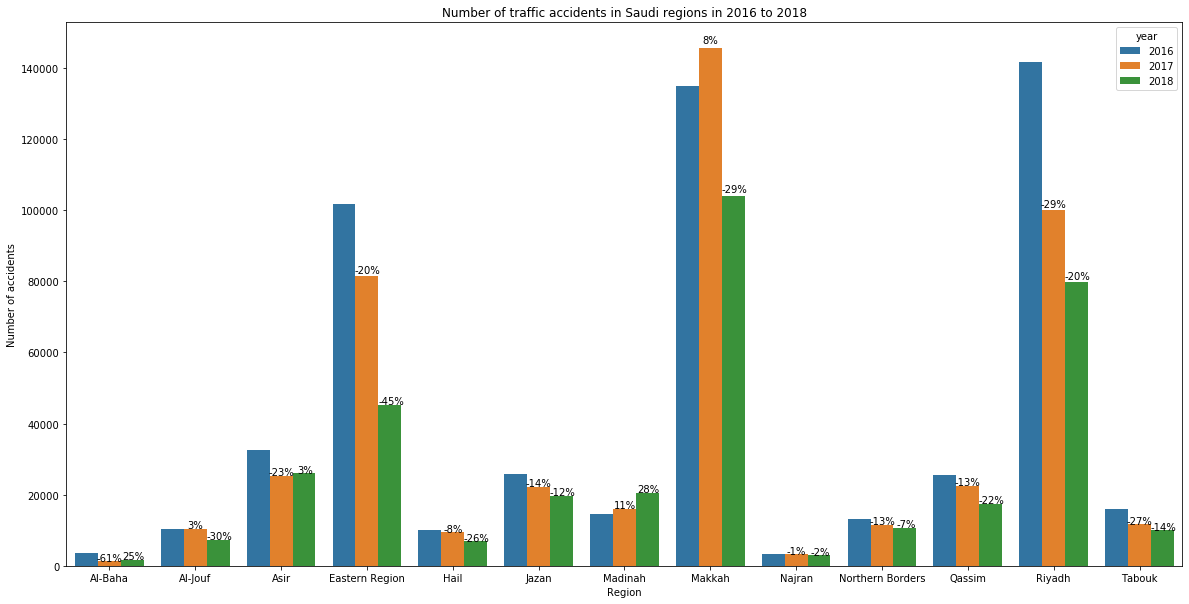

In [99]:
# making a plot
fig, ax = plt.subplots(figsize=(20,10))
# putting a barplot in
gx =sns.barplot(data=accidents , x='region',y='traffic_accidents',hue='year',ax=ax)
# the mess below is to create a text label on top of each 2017 bar to put the drop/increase percentage
# this will not work without sorting the dataframe (g) by region
for idx, region in enumerate(percentage.index):
        # here im calculating the height of each orange bar to use as the y-axis coordinate of the text
        y = accidents[(accidents.year == 2017) & (accidents['region'] == region)]['traffic_accidents'] * 1.01
        y1 = accidents[(accidents.year == 2018) & (accidents['region'] == region)]['traffic_accidents'] * 1.01
        # add the percentage as text at its correct spot
        ax.text(idx,y,"{:.0%}".format(percentage.loc[region,2017]),ha="center") 
        ax.text(idx+0.28,y1,"{:.0%}".format(percentage.loc[region,2018]),ha="center") 
ax.set(title= "Number of traffic accidents in Saudi regions in 2016 to 2018", ylabel='Number of accidents', xlabel='Region')
plt.show()

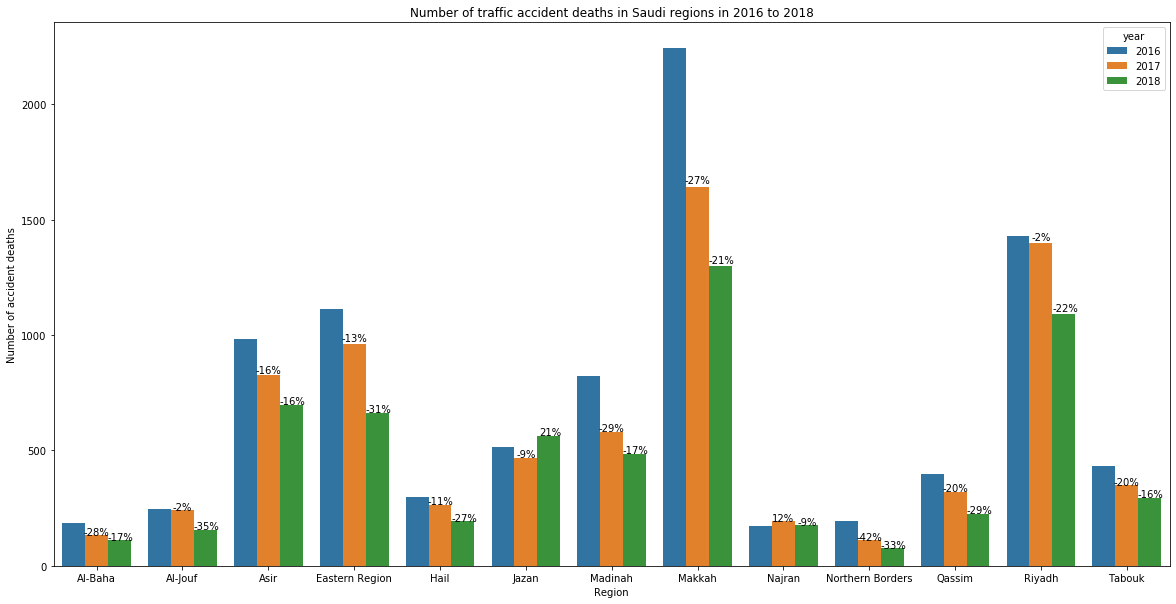

In [100]:
deaths = main_df[(main_df.year.isin([2016,2017,2018]))][["year","region","traffic_casualties_dead"]].sort_values('region')

gg = pd.pivot(deaths,index= 'region',columns='year', values="traffic_casualties_dead")

percentage = pd.DataFrame({years[i]:((gg[years[i]]-gg[years[i-1]])/ gg[years[i-1]]) for i in range(1,len(years))})


# making a plot
fig, ax = plt.subplots(figsize=(20,10))
# putting a barplot in
gx =sns.barplot(data=deaths , x='region',y="traffic_casualties_dead",hue='year',ax=ax)
# the mess below is to create a text label on top of each 2017 bar to put the drop/increase percentage
# this will not work without sorting the dataframe (g) by region
for idx, region in enumerate(percentage.index):
        # here im calculating the height of each orange bar to use as the y-axis coordinate of the text
        y = deaths[(deaths.year == 2017) & (deaths['region'] == region)]["traffic_casualties_dead"] * 1.01
        y1 = deaths[(deaths.year == 2018) & (deaths['region'] == region)]["traffic_casualties_dead"] * 1.01
        # add the percentage as text at its correct spot
        ax.text(idx,y,"{:.0%}".format(percentage.loc[region,2017]),ha="center") 
        ax.text(idx+0.28,y1,"{:.0%}".format(percentage.loc[region,2018]),ha="center") 
ax.set(title= "Number of traffic accident deaths in Saudi regions in 2016 to 2018", ylabel='Number of accident deaths', xlabel='Region')
plt.show()

## Conclusions and Recommendations

- Based on your exploration of the data, what are you key takeaways and recommendations?
- Are there additional data you desire that would better inform your investigations?

Answer:In Conclusion, the reduction in annual traffic accidents and casualties could be linked to recent developments in the infrastructure of Saudi Arabia. However, more data is needed to interpret deviant regions.